### Dependencies

In [2]:
import matplotlib as mpl
import matplotlib.lines as mlines
from matplotlib.ticker import FormatStrFormatter

new_rc_paramas = {
    'text.usetex' : True,
    'figure.dpi' : 180,
    'text.latex.preamble' : r'\usepackage{libertine}'r'\usepackage{libertinust1math}',
    'font.family' : 'Linux Libertine',
    'axes.titlesize' : 22,
    'axes.labelsize' : 18,
    'xtick.labelsize' : 16,
    'ytick.labelsize' : 16,
    'xtick.direction' : 'in',
    'ytick.direction' : 'in',
    'xtick.top' : True,
    'ytick.right' : True,
    'legend.fontsize' : 'large',
    'axes.linewidth' : 1.2,
    'savefig.bbox' : 'tight',
    'image.aspect' : 'equal',
}

Oh2 = mlines.Line2D([], [], color='black', linestyle="-", label=r'$\mathcal{O}(h^2)$')
Oh3 = mlines.Line2D([], [], color='black', linestyle="-.", label=r'$\mathcal{O}(h^3)$')
Oh1 = mlines.Line2D([], [], color='black', linestyle="-", label=r'$\mathcal{O}(h)$')
Ohneg2 = mlines.Line2D([], [], color='black', linestyle="-", label=r'$\mathcal{O}(h^{-2})$')
Ohneg1 = mlines.Line2D([], [], color='black', linestyle="-", label=r'$\mathcal{O}(h^{-1})$')
Odt = mlines.Line2D([], [], color='black', linestyle="--", label=r'$\mathcal{O}(\Delta t)$')
Odt2 = mlines.Line2D([], [], color='black', linestyle="-", label=r'$\mathcal{O}(\Delta t^2)$')
tau1 = mlines.Line2D([], [], color='C4', linestyle="--", label=r'$\tau_0 = \tau_1 = 1$')
tau10neg4 = mlines.Line2D([], [], color='C0', linestyle="-", label=r'$\tau_0 = \tau_1 = 1\cdot 10^{-4}$')
tau10neg3 = mlines.Line2D([], [], color='C0', linestyle="-", label=r'$\tau_0 = \tau_1 = 1\cdot 10^{-3}$')
tau3x10neg3 = mlines.Line2D([], [], color='C0', linestyle="-", label=r'$\tau_0 = \tau_1 = 3\cdot 10^{-3}$')
tau5x10neg3 = mlines.Line2D([], [], color='C0', linestyle="-", label=r'$\tau_0 = \tau_1 = 5\cdot 10^{-3}$')
tau3x10neg4 = mlines.Line2D([], [], color='C2', linestyle="-.", label=r'$\tau_0 = \tau_1 = 3\cdot 10^{-4}$')
tau5x10neg4 = mlines.Line2D([], [], color='C3', linestyle=":", label=r'$\tau_0 = \tau_1 = 5\cdot 10^{-4}$')

conservative = mlines.Line2D([0], [0], marker='None', color='black', linestyle=":", label='Conservative')
classical = mlines.Line2D([0], [0], marker='None', color='black', linestyle=(0, (5,7)), label='Non-conservative')


space = mlines.Line2D([0], [0], marker='None', color='None', linestyle="None", label=' ')

circle = mlines.Line2D([0], [0], marker='o', color='black', 
                          markersize=9, markerfacecolor="None", 
                          linestyle="None", markeredgewidth=0.8,
                           label='Full stabilization.')
                          
star = mlines.Line2D([], [], color='black', marker='*',
                          markersize=9,linestyle="None",
                        markeredgewidth=0.8, markerfacecolor="None", 
                        label='Macro stabilization.')

triangle = mlines.Line2D([0], [0], marker='^', color='black', 
                          markersize=9, markerfacecolor="None", 
                          linestyle="None", markeredgewidth=0.8,
                           label='Macro stab. 2')


import matplotlib.pyplot as plt

mpl.rcParams.update(new_rc_paramas)

import numpy as np


### Description

In example 1, the following plots are generated:

1. Error and condition number vs stabilization constant $\tau$.
2. Error, condition number and nnz vs macro-element parameter $\delta$.
3. Error and condition number vs $h$ when $\Delta t_n \propto h$.
4. Error for conservative (left) and non-conservative (right) schemes vs $\Delta t_n$ for $h=0.005$.
5. Conservation error and nnz vs time $t$ for both schemes, both stabilizations and polynomial orders.
6. Conservation error for conservative (left) and non-conservative (right) schemes in last time point vs $h$.


### 1. Error and condition number vs stabilization constant $\tau$.

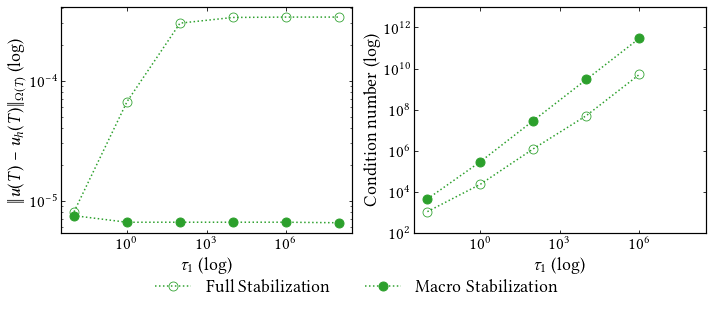

In [3]:
# h = 0.01, lobatto n = 3, T = 0.1, dT = h/3, Method 2 for macro
error_conservative_fullstab = [5.736617964275335e-06, 4.157624809190999e-05, 0.0002381289739341548, 0.0003207399325503981, 0.0003238964030539121, 0.0003239553994138047]
cond_conservative_fullstab = [1.366031e+03, 2.5465e+04, 1.5387e+06, 5.5977e+07, 5.520071e+09]   # last inf
nnz_fullstab = 129876

# delta = 0.5
error_conservative_macro = [5.121453616690796e-06, 4.278439448947408e-06, 4.280496679285899e-06, 4.280515805569344e-06, 4.280995640902946e-06, 4.368088389590622e-06]
cond_conservative_macro = [4.514703e+03, 2.928595e+05, 2.9145e+07, 2.9144e+09, 2.9144e+11]      # last inf
nnz_macro = 117252

# h = 0.0125, lobatto n = 3, T = 0.1, dT = h/3, AlgoimMacro
error_conservative_fullstab = [8.101156529901348e-06, 6.689537678998772e-05, 0.0003015208614124882, 0.0003363357045758615, 0.000338688873970378, 0.0003386734032010332]
cond_conservative_fullstab = [1.0987e+03, 2.3554e+04, 1.2520e+06, 5.1290e+07, 5.1290e+09]
nnz_fullstab = 86688

# delta = 0.5
error_conservative_macro = [7.517491303628505e-06, 6.624728622958252e-06, 6.629225036883698e-06, 6.629278100257246e-06, 6.629749112212584e-06, 6.561957714741836e-06]
cond_conservative_macro = [4.5313e+03, 2.9462e+05, 2.9331e+07, 2.9329e+09, 2.9329e+11]          # last inf
nnz_macro = 76752


tau = [1e-2, 1e0, 1e2, 1e4, 1e6, 1e8]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
ax1.loglog(tau, error_conservative_fullstab, marker='o', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C2")
ax1.loglog(tau, error_conservative_macro,  marker='o', markersize=9, linestyle=":", color="C2")
ax1.set_xlabel(r"$\tau_1$ (log)", fontsize=18)
ax1.tick_params(axis='both', which='major', labelsize=17)
ax1.set_ylabel(r"$\|u(T)-u_h(T)\|_{\Omega(T)}$ (log)", fontsize=18)

ax2.loglog(tau[:-1], cond_conservative_fullstab, marker='o', markersize=9, linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C2")
ax2.loglog(tau[:-1], cond_conservative_macro,  marker='o', markersize=9, linestyle=":", color="C2")
ax2.loglog(tau, tau,  marker='None', linestyle="None")
ax2.loglog([],[], linestyle=":",  marker='o', markersize=9, markeredgewidth=0.8, markerfacecolor="None", color="C2", label=r"Full Stabilization")
ax2.loglog([],[], linestyle=":",  marker='o', markersize=9, color="C2", label=r"Macro Stabilization")
ax2.set_xlabel(r"$\tau_1$ (log)", fontsize=18)
ax2.tick_params(axis='both', which='major', labelsize=17)
ax2.set_ylabel(r"Condition number (log)", fontsize=18)
ax2.set_ylim(1e2, 1e13)
handles, labels = [(a + b) for a, b in zip(ax1.get_legend_handles_labels(), ax2.get_legend_handles_labels())]
fig.legend(handles, labels, loc='lower center', ncols=4, bbox_to_anchor=(0.5, -0.1), fontsize=18, frameon=False)
plt.tight_layout()
plt.show()


### 2. Error, condition number and nnz vs macro-element parameter $\delta$.

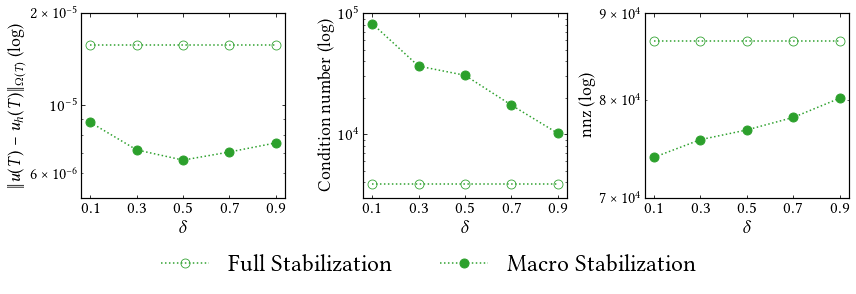

In [4]:
# h = 0.0125
# tau_1 = 0.1
# T = 0.1

error_conservative_macro = [7.158255743741944e-06, 6.633078733781234e-06, 7.203681855252234e-06, 7.725115799461858e-06]
cond_conservative_macro = [3.652207e+04, 3.068008e+04, 1.742298e+04, 1.164437e+04]
nnz_macro = [75816, 76752, 78072, 79440]

# algoimmacro
delta = [0.1, 0.3, 0.5, 0.7, 0.9]
error_conservative_macro = [8.798963664899849e-06, 7.154162986786534e-06, 6.624656265925931e-06, 7.041154064546134e-06, 7.539355618760637e-06]
cond_conservative_macro = [8.208884e+04, 3.652207e+04, 3.068008e+04, 1.742296e+04, 1.0187e+04]
nnz_macro = [73944, 75744, 76752, 78072, 80136]

error_conservative_fullstab = 1.573397156540476e-05*np.ones(np.size(error_conservative_macro))
cond_conservative_fullstab = 3.867161e+03*np.ones(np.size(error_conservative_macro))
nnz_fullstab = 86688*np.ones(np.size(error_conservative_macro))

# vs delta

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 3.5))
ax1.semilogy(delta, error_conservative_fullstab, marker='o', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C2")
ax1.semilogy(delta, error_conservative_macro,  marker='o', markersize=9, linestyle=":", color="C2")
ax1.set_xlabel(r"$\delta$", fontsize=18)
lbs = ['0.1', '0.3', '0.5', '0.7', '0.9']
ax1.set_xticks(delta)
ax1.set_xticklabels(lbs)
ax1.tick_params(axis='both', which='major', labelsize=17)
ax1.set_ylabel(r"$\|u(T)-u_h(T)\|_{\Omega(T)}$ (log)", fontsize=18)
ax1.set_ylim(5e-6, 2e-5)

ax2.semilogy(delta, cond_conservative_fullstab, marker='o', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C2")
ax2.semilogy(delta, cond_conservative_macro,  marker='o', markersize=9, linestyle=":", color="C2")
#ax2.semilogy(delta, delta,  marker='None', linestyle="None")
ax2.semilogy([],[], marker='o', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C2", label=r"Full Stabilization")
ax2.semilogy([],[], linestyle=":",  marker='o', markersize=9, color="C2", label=r"Macro Stabilization")
ax2.set_xlabel(r"$\delta$", fontsize=18)
ax2.set_ylim(3e3, 1e5)
ax2.set_xticks(delta)
ax2.set_xticklabels(lbs)
ax2.tick_params(axis='both', which='major', labelsize=17)
ax2.set_ylabel(r"Condition number (log)", fontsize=18)
#ax2.set_ylim(1e2, 1e13)

ax3.semilogy(delta, nnz_fullstab, marker='o', markersize=9,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C2")
ax3.semilogy(delta, nnz_macro,  marker='o', markersize=9, linestyle=":", color="C2")
ax3.set_xlabel(r"$\delta$", fontsize=18)
ax3.set_ylim(7e4, 9e4)
ax3.set_xticks(delta)
ax3.set_xticklabels(lbs)
ax3.tick_params(axis='both', which='major', labelsize=17)
ax3.set_ylabel(r"nnz (log)", fontsize=18)
#ax3.set_ylim(7e4, 9e4)

handles, labels = [(a + b + c) for a, b, c in zip(ax1.get_legend_handles_labels(), ax2.get_legend_handles_labels(), ax3.get_legend_handles_labels())]
fig.legend(handles, labels, loc='lower center', ncols=4, bbox_to_anchor=(0.5, -0.2), fontsize=24, frameon=False)
plt.tight_layout()
plt.show()

### 3. Error and condition number vs $h$ when $\Delta t_n \propto h$.

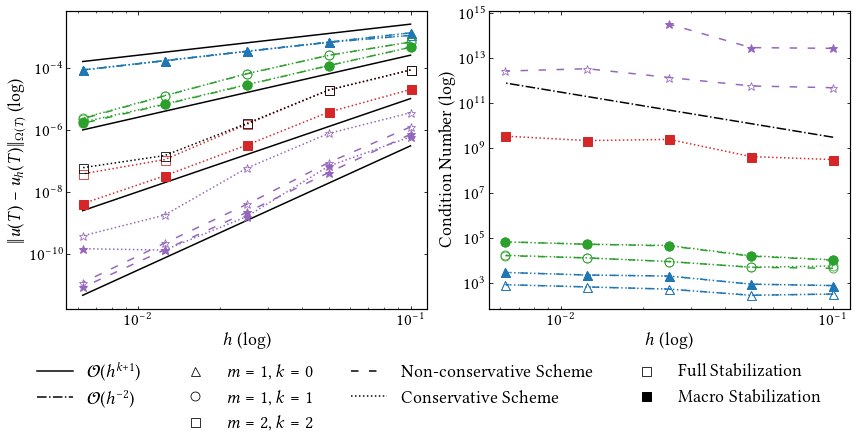

In [37]:
# Condition numbers are computed with condest

# P0P1
error_conservative_P0P1_fullstab = [0.001088076182636752, 0.0006491740578439569, 0.0003333812765067587, 0.0001666554028157588, 8.334326437297446e-05]
cond_conservative_P0P1_fullstab = [3.293664e+02,2.900614e+02,5.433976e+02,6.808435e+02,8.558770e+02]

error_conservative_P0P1_macro = [0.001313901235987455, 0.0006574471900280799, 0.0003317308567752578, 0.0001659892293630661, 8.32059567177379e-05]
cond_conservative_P0P1_macro = [7.827596e+02,9.040583e+02,2.067112e+03,2.295860e+03,2.992382e+03]

error_classical_P0P1_fullstab = [0.001089690761110918, 0.0006482400399029844, 0.0003334932551910931, 0.0001666672849441996, 8.334815967403742e-05]
cond_classical_P0P1_fullstab = [3.293521e+02,2.900576e+02,5.433547e+02,6.808442e+02,8.558772e+02]

error_classical_P0P1_macro = [0.001314024004368534, 0.0006574128712049226, 0.0003317615465742849, 0.0001659917761925381, 8.320731471188712e-05]
cond_classical_P0P1_macro = [7.824315e+02,9.040288e+02,2.066754e+03,2.295858e+03,2.992390e+03]

nnz_P0P1_fullstab = [1074,2460,7287,21672,75129]
nnz_P0P1_macro = [834,1878,5961,19188,69993]

# P1P1
# delta = 0.5, T = 0.1, dT=h/3, lobatto n = 3, P3 interpolation both space & time
error_conservative_P1P1_macro = [0.0004497536195905485, 0.0001148872513125353, 2.801857859882853e-05, 6.64869423513326e-06, 1.739942525707841e-06]
cond_conservative_P1P1_macro = [1.090070e+04,1.639250e+04,4.691267e+04,5.368264e+04,6.817228e+04]
nnz_P1P1_macro = [3336,7512,23844,76752,279972]

# error_conservative_P1P1_fullstab_patch =
# cond_conservative_P1P1_fullstab_patch = 

error_conservative_P1P1_fullstab = [0.0006663906942903397, 0.0002462839007548384, 6.321940038638657e-05, 1.246094052968081e-05, 2.337096191457098e-06]
cond_conservative_P1P1_fullstab = [5.798977e+03,5.099834e+03,9.154832e+03,1.327019e+04,1.729418e+04]
nnz_P1P1_fullstab = [4296,9840,29148,86688,300516]

error_classical_P1P1_fullstab = [0.0006624698818069199, 0.0002470175780063419, 6.249118040554817e-05, 1.22721498068521e-05, 2.232837016879022e-06]
cond_classical_P1P1_fullstab = [4.585025e+03,5.079001e+03,9.104521e+03,1.320964e+04,1.672331e+04]


error_classical_P1P1_macro = [0.0004495561169776955, 0.0001150159513064808, 2.740249888772975e-05, 6.465636169505382e-06, 1.588641455991942e-06] 
cond_classical_P1P1_macro = [1.055563e+04,1.577429e+04,4.529231e+04,5.335741e+04,6.834885e+04]


# P2P2


# n = 5
error_conservative_P2P2_fullstab = [8.335375514965243e-05, 1.873600894417075e-05, 1.469560269617318e-06, 1.077088286906057e-07, 3.733155798362057e-08]
# cond_conservative_P2P2_fullstab = 

# delta = 0.5, T = 0.1, dT = h/3, lobatto n = 5

error_conservative_P2P2_macro = [1.969496434419448e-05, 3.70438458355385e-06, 4.152409274877422e-07, 3.926742467893485e-08, 1.241820426040728e-08]
cond_conservative_P2P2_macro = [3.075440e+08,4.145235e+08,2.403757e+09,2.133025e+09,3.357496e+09]

# delta = 0.5, T = 0.1, dT = h/3, lobatto n = 7
error_conservative_P2P2_macro = [1.961490368664613e-05, 3.646892889205503e-06, 3.148119937681194e-07, 3.237983342519889e-08, 4.095739515566473e-09]
cond_conservative_P2P2_macro = [3.070250e+08,4.140698e+08,2.408753e+09,2.134556e+09,3.360019e+09]


# error_classical_P2P2_fullstab =
# cond_classical_P2P2_fullstab = 

# error_classical_P2P2_macro = 
# cond_classical_P2P2_macro = 

# nnz_P2P2_fullstab = 
nnz_P2P2_macro = [55107,121635,390555,1239003,4505139]


# P3Poly x P2, lobatto n = 5

error_conservative_P3PolyP2_fullstab = [8.364025246200347e-05, 1.876030981688799e-05, 1.574287960544133e-06, 1.455867523989365e-07, 5.916546366983002e-08]







# P3P3, delta = 0.5, T = 0.1, dT = h/3, 

# space = time = 7
error_conservative_P3P3_macro = [9.283242891385952e-07, 1.502978940217463e-06, 2.547029703506079e-07, 4.515463428682432e-08, 1.67137127868449e-08]

# lobatto n = 9, space n = 7
error_conservative_P3P3_fullstab = [1.230679911104749e-06, 4.450793335800824e-07, 1.462248570537432e-08, 4.015429698389802e-09]
cond_conservative_P3P3_fullstab = [4.747761e+11,5.664064e+11,1.346252e+12,3.307710e+12]

# lobatto n = 10, space n = 7, tau1 = 10
error_conservative_P3P3_fullstab = [3.561631292515755e-06, 7.410678070417087e-07, 5.649097887209412e-08, 1.747417867052343e-09, 1.289402068949506e-09]


# error_conservative_P3P3_macro = [8.707012050400018e-07, 5.62319374097584e-07, 8.566174213909749e-08, 6.431833409151911e-09]
# cond_conservative_P3P3_macro = [2.655611e+13,2.856219e+13,3.149955e+14,2.653597e+14]

# n = 20, space = 7, tau1 = 10
error_conservative_P3P3_macro = [5.852632180985024e-07, 6.596143623223131e-08, 1.569344213017489e-09, 1.313738492434687e-10, 1.450141722175934e-10]

# n = 20, space = 7, tau1 = 0.1
#error_conservative_P3P3_macro = [5.717519232488962e-07, 7.998059918868946e-08, 4.346483262356795e-09, 2.293095089117721e-10, 6.702794678161153e-10]

# with dT = h^2/3
#error_conservative_P3P3_macro = [8.82018e-07, ]

# n = 14, space = 7, tau = 10
error_conservative_P3P3_fullstab = [3.492971234784989e-06, 7.502947329487542e-07, 5.70293992531811e-08, 1.76250876339433e-09, 3.765381266643046e-10]

# time = 7, space = 5               # time quadrature order = space quadrature order = 7

error_classical_P3P3_fullstab = [1.219470080569245e-06, 8.676514660169436e-08, 3.880704664179111e-09, 2.194548344468484e-10, 1.170157076756793e-11] #[1.219470080569245e-06, 8.676514660169436e-08, 3.880704664179111e-09]
cond_classical_P3P3_fullstab = [4.747748e+11,5.664648e+11,1.346285e+12,3.307691e+12,2.596705e+12]       # non-condest: [9.324134e+10,1.166743e+11,2.233956e+11]
nnz_P3P3_fullstab = [507936,1153344,3333360,9391872,31583568]

# time = 7, space = 7
error_classical_P3P3_macro = [7.082900717297273e-07, 4.112852673193111e-08, 2.143297479270472e-09, 1.334009430400426e-10, 8.266185849248742e-12]
#cond_classical_P3P3_macro = [5.860654e+12,Inf,Inf]
cond_classical_P3P3_macro = [2.653075e+13,2.853177e+13,314301084359682] # condest
nnz_P3P3_macro = [359328,779232,2499600]

# # time 9, space 7
# error_classical_P3P3_macro = [7.083489357278553e-07, 4.112799338666113e-08, 2.143386086319943e-09]
# cond_classical_P3P3_macro = [2.656267e+13,2.856320e+13,3.149542e+14]

h = [0.1, 0.05, 0.025, 0.0125, 0.00625]


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

ax1.loglog(h, 0.25e-1*np.power(h, 1), linestyle="-", color="black")  
ax1.loglog(h, 0.25e-1*np.power(h, 2), linestyle="-", color="black")  
ax1.loglog(h, 1.e-2*np.power(h, 3), linestyle="-", color="black") 
ax1.loglog(h, 3.e-3*np.power(h, 4), linestyle="-", color="black")  
ax1.loglog(h, error_conservative_P0P1_fullstab, marker='^', markersize=9, linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C0")
ax1.loglog(h, error_conservative_P0P1_macro, marker='^', markersize=9, linestyle=":", color="C0")
ax1.loglog(h, error_conservative_P1P1_fullstab, marker='o', markersize=9, linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C2")
ax1.loglog(h, error_conservative_P1P1_macro, marker='o', markersize=9, linestyle=":", color="C2")
ax1.loglog(h, error_conservative_P2P2_fullstab, marker='s', markersize=9, linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C3")
ax1.loglog(h, error_conservative_P2P2_macro, marker='s', markersize=9, linestyle=":", color="C3")
ax1.loglog(h, error_conservative_P3PolyP2_fullstab, marker='s', markersize=9, linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="black")

ax1.loglog(h, error_conservative_P3P3_fullstab, marker='*', markersize=9, linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C4")
ax1.loglog(h, error_conservative_P3P3_macro, marker='*', markersize=9, linestyle=":", color="C4")

ax1.loglog(h, error_classical_P0P1_fullstab, marker='^', markersize=9, linestyle=(0, (5,7)), markeredgewidth=0.8, markerfacecolor="None", color="C0")
ax1.loglog(h, error_classical_P0P1_macro, marker='^', markersize=9, linestyle=(0, (5,7)), color="C0")
ax1.loglog(h, error_classical_P1P1_fullstab, marker='o', markersize=9, linestyle=(0, (5,7)), markeredgewidth=0.8, markerfacecolor="None", color="C2")
ax1.loglog(h, error_classical_P1P1_macro, marker='o', markersize=9, linestyle=(0, (5,7)), color="C2")
# ax1.loglog(h, error_classical_P2P2_fullstab, marker='s', markersize=9, linestyle=(0, (5,7)), markeredgewidth=0.8, markerfacecolor="None", color="C3")
# ax1.loglog(h, error_classical_P2P2_macro, marker='s', markersize=9, linestyle=(0, (5,7)), color="C3")
ax1.loglog(h, error_classical_P3P3_fullstab, marker='*', markersize=9, linestyle=(0, (5,7)), markeredgewidth=0.8, markerfacecolor="None", color="C4")
ax1.loglog(h, error_classical_P3P3_macro, marker='*', markersize=9, linestyle=(0, (5,7)), color="C4")

ax1.loglog(h, )
ax1.set_xlabel(r"$h$ (log)", fontsize=18)
ax1.tick_params(axis='both', which='major', labelsize=17)
ax1.set_ylabel(r"$\|u(T)-u_h(T)\|_{\Omega(T)}$ (log)", fontsize=18)

ax2.loglog([],[], label=r"$\mathcal{O}(h^{k+1})$", linestyle="-", color="black")
ax2.loglog(h, 3e7*np.power(h, -2), label=r"$\mathcal{O}(h^{-2})$", linestyle="-.", color="black")
ax2.loglog([],[], linestyle="None", label=" ")
ax2.loglog([],[], linestyle="None",  marker='^', markersize=9, markeredgewidth=0.8, markerfacecolor="None", color="black", label=r"$m=1, k=0$")
ax2.loglog([],[], linestyle="None",  marker='o', markersize=9, markeredgewidth=0.8, markerfacecolor="None", color="black", label=r"$m=1, k=1$")
ax2.loglog([],[], linestyle="None",  marker='s', markersize=9, markeredgewidth=0.8, markerfacecolor="None", color="black", label=r"$m=2, k=2$")
#ax2.loglog([],[], linestyle="None", label=" ")
ax2.loglog([],[], linestyle=(0, (5,7)), color="black",label=r"Non-conservative Scheme")
ax2.loglog([],[], linestyle=":", color="black", label=r"Conservative Scheme")
#ax2.loglog([],[], linestyle="None", label=" ")
ax2.loglog([],[], linestyle="None",  marker='s', markersize=9, markeredgewidth=0.8, markerfacecolor="None", color="black", label=r"Full Stabilization")
ax2.loglog([],[], linestyle="None",  marker='s', markersize=9, color="black", label=r"Macro Stabilization")

ax2.loglog(h, cond_conservative_P0P1_fullstab, marker='^', markersize=9, linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C0")
ax2.loglog(h, cond_conservative_P0P1_macro, marker='^', markersize=9, linestyle=":", color="C0")
ax2.loglog(h, cond_conservative_P1P1_fullstab, marker='o', markersize=9, linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C2")
ax2.loglog(h, cond_conservative_P1P1_macro, marker='o', markersize=9, linestyle=":", color="C2")
# ax2.loglog(h, cond_conservative_P2P2_fullstab, marker='s', markersize=9, linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C3")
ax2.loglog(h, cond_conservative_P2P2_macro, marker='s', markersize=9, linestyle=":", color="C3")
#ax2.loglog(h[:-1], cond_conservative_P3P3_fullstab, marker='*', markersize=9, linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C4")
#ax2.loglog(h[:-1], cond_conservative_P3P3_macro, marker='*', markersize=9, linestyle=":", color="C4")

ax2.loglog(h, cond_classical_P0P1_fullstab, marker='^', markersize=9, linestyle=(0, (5,7)), markeredgewidth=0.8, markerfacecolor="None", color="C0")
ax2.loglog(h, cond_classical_P0P1_macro, marker='^', markersize=9, linestyle=(0, (5,7)), color="C0")
ax2.loglog(h, cond_classical_P1P1_fullstab, marker='o', markersize=9, linestyle=(0, (5,7)), markeredgewidth=0.8, markerfacecolor="None", color="C2")
ax2.loglog(h, cond_classical_P1P1_macro, marker='o', markersize=9, linestyle=(0, (5,7)), color="C2")
# ax2.loglog(h, cond_classical_P2P2_fullstab, marker='s', markersize=9, linestyle=(0, (5,7)), markeredgewidth=0.8, markerfacecolor="None", color="C3")
# ax2.loglog(h, cond_classical_P2P2_macro, marker='s', markersize=9, linestyle=(0, (5,7)), color="C3")

ax2.loglog(h, cond_classical_P3P3_fullstab, marker='*', markersize=9, linestyle=(0, (5,7)), markeredgewidth=0.8, markerfacecolor="None", color="C4")
ax2.loglog(h[:-2], cond_classical_P3P3_macro, marker='*', markersize=9, linestyle=(0, (5,7)), color="C4")

ax2.set_xlabel(r"$h$ (log)", fontsize=18)
ax2.tick_params(axis='both', which='major', labelsize=17)
ax2.set_ylabel(r"Condition Number (log)", fontsize=18)

handles, labels = [(a + b) for a, b in zip(ax1.get_legend_handles_labels(), ax2.get_legend_handles_labels())]
fig.legend(handles, labels, loc='lower center', ncols=4, bbox_to_anchor=(0.5, -0.25), fontsize=18, frameon=False)
plt.tight_layout()
plt.show()

### 4. Error for conservative (left) and non-conservative (right) schemes vs $\Delta t_n$ for $h=0.005$.

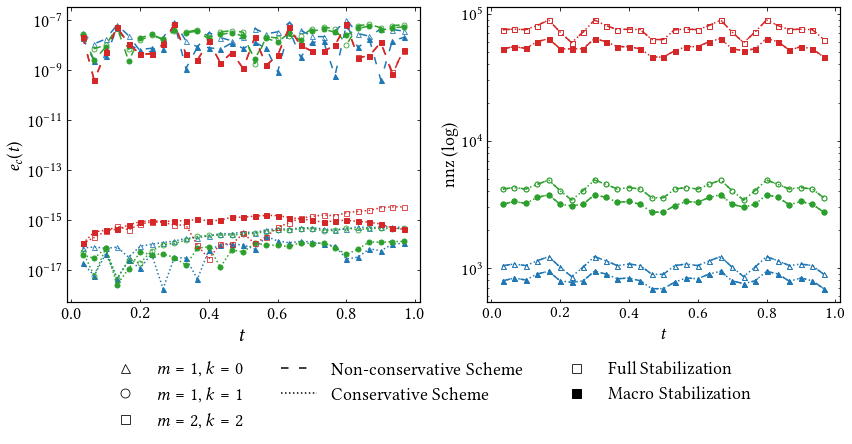

In [6]:

### Conservation error

ec_classical_fullstab_P0P1 = [0, 2.97922e-08, 1.10891e-08, 1.71507e-08, 6.35988e-08, 2.33267e-08, 5.71193e-09, 5.21837e-09, 1.94858e-08, 8.22301e-08, 1.44504e-08, 8.31785e-09, 3.08215e-08, 1.96376e-08, 1.45827e-08, 1.98057e-08, 4.50671e-08, 2.74738e-08, 3.32924e-08, 7.68747e-08, 3.8451e-08, 2.19344e-08, 2.12952e-08, 3.57427e-08, 9.87637e-08, 2.8538e-08, 2.22261e-08, 4.34785e-08, 4.08866e-08, 3.58496e-08]
nnz_classical_fullstab_P0P1 = [891,1044,1074,1044,1137,1230,1014,855,1014,1230,1137,1044,1074,1044,891,891,1044,1074,1044,1137,1230,1014,855,1014,1230,1137,1044,1074,1044,891]

ec_classical_macro_P0P1 = [0, 1.95342e-08, 2.20593e-09, 3.45783e-09, 4.78367e-08, 9.94656e-09, 6.49306e-09, 7.34466e-09, 7.0181e-09, 7.39801e-08, 1.13291e-09, 8.15204e-09, 7.80626e-09, 6.57717e-09, 1.20466e-08, 7.21632e-09, 1.28913e-08, 7.2638e-09, 8.33424e-10, 4.06744e-08, 3.25835e-09, 1.24857e-08, 1.37611e-08, 5.89183e-10, 6.49559e-08, 7.88923e-09, 1.70021e-08, 3.90645e-10, 1.46509e-08, 1.98533e-08]
nnz_classical_macro_P0P1 = [687,792,834,804,897,942,792,771,792,942,897,822,834,792,687,687,774,834,822,897,942,792,753,792,942,897,786,834,792,687]

ec_conservative_fullstab_P0P1 = [0, 7.38647e-17, 8.21317e-17, 7.19944e-17, 8.07358e-17, 3.17908e-17, 8.78661e-17, 1.05084e-16, 1.23151e-16, 1.4184e-16, 1.81813e-16, 1.91584e-16, 2.29064e-16, 2.78666e-16, 2.77401e-16, 3.29188e-16, 3.02557e-16, 3.97459e-16, 4.40949e-16, 4.11987e-16, 4.84094e-16, 4.78906e-16, 4.32302e-16, 4.02849e-16, 4.22555e-16, 5.31659e-16, 4.71412e-16, 5.22437e-16, 5.2262e-16, 4.90492e-16]
nnz_conservative_fullstab_P0P1 = [891,1044,1074,1044,1137,1230,1014,855,1014,1230,1137,1044,1074,1044,891,891,1044,1074,1044,1137,1230,1014,855,1014,1230,1137,1044,1074,1044,891]

ec_conservative_macro_P0P1 = [0, 1.83535e-17, 5.80387e-18, 4.42388e-17, 4.40796e-18, 2.37203e-17, 1.15383e-17, 4.26335e-17, 1.74934e-18, 3.16327e-17, 2.91572e-17, 4.2341e-18, 6.25303e-17, 9.82548e-17, 1.03928e-16, 1.00205e-16, 6.6635e-17, 2.17048e-16, 1.42577e-16, 1.20554e-16, 1.37149e-16, 1.31962e-16, 1.06174e-16, 9.05991e-17, 2.70377e-17, 3.20589e-17, 6.89557e-17, 5.75309e-17, 1.06286e-16, 1.15792e-16]
nnz_conservative_macro_P0P1 = [687,792,834,804,897,942,792,771,792,942,897,822,834,792,687,687,774,834,822,897,942,792,753,792,942,897,786,834,792,687]



ec_conservative_macro = [0, 3.91702e-17, 2.88906e-17, 7.37224e-17, 2.53093e-18, 1.09742e-17, 5.09118e-17, 4.06332e-17, 4.33827e-17, 3.08174e-17, 1.52794e-17, 7.3623e-17, 8.3347e-17, 1.27675e-17, 6.22948e-17, 5.16324e-17, 1.15207e-16, 9.90865e-17, 9.40043e-17, 8.58593e-17, 1.23271e-16, 1.11145e-16, 1.20052e-16, 7.67213e-17, 4.09155e-17, 6.67534e-17, 1.31406e-16, 1.2692e-16, 1.34042e-16, 1.36608e-16]
nnz_conservative_macro = [2748,3168,3336,3216,3588,3768,3168,3084,3168,3768,3588,3288,3336,3168,2748,2748,3096,3336,3288,3588,3768,3168,3012,3168,3768,3588,3144,3336,3168,2748]

ec_conservative_fullstab = [0, 5.3048e-17, 5.80387e-18, 7.19944e-17, 4.40796e-18, 2.48519e-17, 1.84772e-17, 5.65113e-17, 1.02334e-16, 1.14084e-16, 1.54057e-16, 2.1934e-16, 2.36003e-16, 2.43972e-16, 2.49645e-16, 2.66738e-16, 2.8868e-16, 3.35009e-16, 3.92377e-16, 3.91171e-16, 4.4246e-16, 4.37273e-16, 3.69852e-16, 3.75094e-16, 4.71127e-16, 3.9982e-16, 4.50595e-16, 4.53048e-16, 4.46292e-16, 4.48858e-16]
nnz_conservative_fullstab = [3564,4176,4296,4176,4548,4920,4056,3420,4056,4920,4548,4176,4296,4176,3564,3564,4176,4296,4176,4548,4920,4056,3420,4056,4920,4548,4176,4296,4176,3564]

ec_classical_fullstab = [0, 2.76094e-08, 7.05734e-09, 9.73189e-09, 5.05698e-08, 6.64383e-09, 1.55699e-08, 2.37701e-08, 1.69936e-08, 3.70087e-08, 3.22435e-08, 4.03313e-08, 2.12898e-08, 3.28235e-08, 3.73892e-08, 3.2042e-08, 1.77426e-09, 2.14097e-08, 1.8775e-08, 2.22515e-08, 2.18336e-08, 4.39835e-08, 5.19421e-08, 4.36733e-08, 9.92317e-09, 5.90004e-08, 6.6095e-08, 4.85916e-08, 5.94011e-08, 6.3902e-08]
nnz_classical_fullstab = [3564,4176,4296,4176,4548,4920,4056,3420,4056,4920,4548,4176,4296,4176,3564,3564,4176,4296,4176,4548,4920,4056,3420,4056,4920,4548,4176,4296,4176,3564]

ec_classical_macro = [0, 2.41135e-08, 2.44801e-09, 8.21686e-09, 4.83531e-08, 2.32224e-09, 1.90026e-08, 2.62201e-08, 1.68348e-08, 3.9629e-08, 3.10858e-08, 3.49061e-08, 1.72755e-08, 2.60912e-08, 3.09244e-08, 2.22844e-08, 2.71e-09, 1.81966e-08, 1.32502e-08, 2.91466e-08, 1.51399e-08, 3.57489e-08, 4.21305e-08, 3.22468e-08, 2.41432e-08, 4.53592e-08, 5.6971e-08, 3.82843e-08, 4.80028e-08, 5.29452e-08]
nnz_classical_macro = [2748,3168,3336,3216,3588,3768,3168,3084,3168,3768,3588,3288,3336,3168,2748,2748,3096,3336,3288,3588,3768,3168,3012,3168,3768,3588,3144,3336,3168,2748]


ec_classical_fullstab_P2P2 = [0, 2.11739e-08, 3.83792e-10, 5.01429e-09, 5.09952e-08, 1.06585e-08, 4.41733e-09, 4.41192e-09, 1.07826e-08, 6.94217e-08, 4.28243e-09, 2.47266e-09, 1.38479e-08, 1.93189e-09, 4.81464e-09, 1.1383e-09, 2.00335e-08, 1.53362e-09, 3.86148e-09, 4.98015e-08, 9.51113e-09, 5.55825e-09, 5.5531e-09, 9.64519e-09, 6.82908e-08, 3.15087e-09, 3.60405e-09, 1.27127e-08, 7.88837e-10, 5.95405e-09]
nnz_classical_fullstab_P2P2 =[62667,74979,75627,74979,80811,89235,71739,59211,71739,89235,80811,74979,75627,74979,62667,62667,74979,75627,74979,80811,89235,71739,59211,71739,89235,80811,74979,75627,74979,62667]

ec_classical_macro_P2P2 = [0, 2.11154e-08, 3.76066e-10, 5.03319e-09, 5.11469e-08, 1.07542e-08, 4.30425e-09, 4.29855e-09, 1.09024e-08, 6.95838e-08, 4.35051e-09, 2.44738e-09, 1.39004e-08, 1.90956e-09, 4.81746e-09, 1.14139e-09, 1.99599e-08, 1.53058e-09, 3.84502e-09, 4.98631e-08, 9.49651e-09, 5.56365e-09, 5.55783e-09, 9.64688e-09, 6.82523e-08, 3.08224e-09, 3.69527e-09, 1.26578e-08, 6.67189e-10, 6.06058e-09]
nnz_classical_macro_P2P2 = [45603,52947,55107,53379,60291,63747,52947,52947,52947,63747,60291,55107,55107,52947,45603,45603,51219,55107,55107,60291,63747,52947,51219,52947,63747,60291,51651,55107,52947,45603]

ec_conservative_fullstab_P2P2 = [0, 1.12811e-16, 1.96173e-16, 3.49432e-16, 5.52401e-16, 3.98143e-16, 6.7649e-16, 8.12967e-16, 8.03032e-16, 6.06998e-16, 6.23796e-16, 9.55255e-17, 2.74366e-17, 1.11313e-16, 1.05595e-16, 2.84028e-16, 1.13557e-16, 2.07645e-16, 4.92661e-16, 7.70169e-16, 1.17455e-15, 1.35776e-15, 1.56397e-15, 1.44359e-15, 1.92161e-15, 2.17973e-15, 2.38087e-15, 3.03812e-15, 3.27857e-15, 3.29812e-15]
nnz_conservative_fullstab_P2P2 = [62667,74979,75627,74979,80811,89235,71739,59211,71739,89235,80811,74979,75627,74979,62667,62667,74979,75627,74979,80811,89235,71739,59211,71739,89235,80811,74979,75627,74979,62667]

ec_conservative_macro_P2P2 = [0, 1.12811e-16, 3.21073e-16, 3.91065e-16, 4.13623e-16, 6.27126e-16, 8.36084e-16, 9.2399e-16, 8.51604e-16, 8.98431e-16, 9.29108e-16, 1.03922e-15, 9.02375e-16, 9.64215e-16, 1.27133e-15, 1.26935e-15, 1.40419e-15, 1.49932e-15, 1.47798e-15, 1.22823e-15, 1.10141e-15, 9.39016e-16, 8.02192e-16, 9.22572e-16, 9.58036e-16, 8.66441e-16, 8.04079e-16, 6.74192e-16, 4.75376e-16, 4.14188e-16]
nnz_conservative_macro_P2P2 = [45603,52947,55107,53379,60291,63747,52947,52947,52947,63747,60291,55107,55107,52947,45603,45603,51219,55107,55107,60291,63747,52947,51219,52947,63747,60291,51651,55107,52947,45603]

times = [0, 0.0333333, 0.0666667, 0.1, 0.133333, 0.166667, 0.2, 0.233333, 0.266667, 0.3, 0.333333, 0.366667, 0.4, 0.433333, 0.466667, 0.5, 0.533333, 0.566667, 0.6, 0.633333, 0.666667, 0.7, 0.733333, 0.766667, 0.8, 0.833333, 0.866667, 0.9, 0.933333, 0.966667]

fig7, (ax7, ax8) = plt.subplots(1, 2, figsize=(12, 5))

ax7.semilogy([],[], linestyle="None",  marker='^', markersize=9, markeredgewidth=0.8, markerfacecolor="None", color="black", label=r"$m=1, k=0$")
ax7.semilogy([],[], linestyle="None",  marker='o', markersize=9, markeredgewidth=0.8, markerfacecolor="None", color="black", label=r"$m=1, k=1$")
ax7.semilogy([],[], linestyle="None",  marker='s', markersize=9, markeredgewidth=0.8, markerfacecolor="None", color="black", label=r"$m=2, k=2$")
ax7.semilogy([],[], linestyle=(0, (5,7)), color="black",label=r"Non-conservative Scheme")
ax7.semilogy([],[], linestyle=":", color="black", label=r"Conservative Scheme")
ax7.semilogy([],[], linestyle="None", label=" ")
#ax7.semilogy([],[], linestyle="None", label=" ")
ax7.semilogy([],[], linestyle="None",  marker='s', markersize=9, markeredgewidth=0.8, markerfacecolor="None", color="black", label=r"Full Stabilization")
ax7.semilogy([],[], linestyle="None",  marker='s', markersize=9, color="black", label=r"Macro Stabilization")

ax7.semilogy(times[1:], ec_conservative_fullstab_P0P1[1:], marker='^', markersize=5,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C0")
ax7.semilogy(times[1:], ec_conservative_macro_P0P1[1:], marker='^', markersize=5,linestyle=":", color="C0")
ax7.semilogy(times[1:], ec_classical_fullstab_P0P1[1:],   marker='^', markersize=5,linestyle=(0, (5,7)), markeredgewidth=0.8, markerfacecolor="None", color="C0")
ax7.semilogy(times[1:], ec_classical_macro_P0P1[1:],   marker='^', markersize=5,linestyle=(0, (5,7)), color="C0")

ax7.semilogy(times[1:], ec_conservative_fullstab[1:], marker='o', markersize=5,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C2")
ax7.semilogy(times[1:], ec_conservative_macro[1:], marker='o', markersize=5,linestyle=":", color="C2")
ax7.semilogy(times[1:], ec_classical_fullstab[1:],   marker='o', markersize=5,linestyle=(0, (5,7)), markeredgewidth=0.8, markerfacecolor="None", color="C2")
ax7.semilogy(times[1:], ec_classical_macro[1:],   marker='o', markersize=5,linestyle=(0, (5,7)), color="C2")

ax7.semilogy(times[1:], ec_conservative_fullstab_P2P2[1:], marker='s', markersize=5,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C3")
ax7.semilogy(times[1:], ec_conservative_macro_P2P2[1:], marker='s', markersize=5,linestyle=":", color="C3")
ax7.semilogy(times[1:], ec_classical_fullstab_P2P2[1:],   marker='s', markersize=5,linestyle=(0, (5,7)), markeredgewidth=0.8, markerfacecolor="None", color="C3")
ax7.semilogy(times[1:], ec_classical_macro_P2P2[1:],   marker='s', markersize=5,linestyle=(0, (5,7)), color="C3")

ax7.semilogy([],[], linestyle="None", label=" ")
ax7.tick_params(axis='both', which='major', labelsize=18)

ax8.semilogy(times[1:], nnz_conservative_fullstab_P0P1[1:], marker='^', markersize=5,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C0")
ax8.semilogy(times[1:], nnz_conservative_macro_P0P1[1:], marker='^', markersize=5,linestyle=":", color="C0")
ax8.semilogy(times[1:], nnz_classical_fullstab_P0P1[1:],   marker='^', markersize=5,linestyle=(0, (5,7)), markeredgewidth=0.8, markerfacecolor="None", color="C0")
ax8.semilogy(times[1:], nnz_classical_macro_P0P1[1:],   marker='^', markersize=5,linestyle=(0, (5,7)), color="C0")

ax8.semilogy(times[1:], nnz_conservative_fullstab[1:], marker='o', markersize=5,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C2")
ax8.semilogy(times[1:], nnz_conservative_macro[1:], marker='o', markersize=5,linestyle=":", color="C2")
ax8.semilogy(times[1:], nnz_classical_fullstab[1:],   marker='o', markersize=5,linestyle=(0, (5,7)), markeredgewidth=0.8, markerfacecolor="None", color="C2")
ax8.semilogy(times[1:], nnz_classical_macro[1:],   marker='o', markersize=5,linestyle=(0, (5,7)), color="C2")

ax8.semilogy(times[1:], nnz_conservative_fullstab_P2P2[1:], marker='s', markersize=5,linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C3")
ax8.semilogy(times[1:], nnz_conservative_macro_P2P2[1:], marker='s', markersize=5,linestyle=":", color="C3")
ax8.semilogy(times[1:], nnz_classical_fullstab_P2P2[1:],   marker='s', markersize=5,linestyle=(0, (5,7)), markeredgewidth=0.8, markerfacecolor="None", color="C3")
ax8.semilogy(times[1:], nnz_classical_macro_P2P2[1:],   marker='s', markersize=5,linestyle=(0, (5,7)), color="C3")

ax8.set_xlabel(r"$t$", fontsize=18)
ax8.tick_params(axis='both', which='major', labelsize=17)
ax8.set_ylabel(r"nnz (log)", fontsize=18)

handles, labels = [(a + b) for a, b in zip(ax7.get_legend_handles_labels(), ax8.get_legend_handles_labels())]
fig7.legend(handles, labels, loc='lower center', ncols=3, bbox_to_anchor=(0.5, -0.25), fontsize=18, frameon=False)
#ax7.legend(handles=[Rey,III,circle],prop={'size': 18},frameon=False)
#ax7.legend(prop={'size': 18},frameon=False)
ax7.set_xlabel(r"$t$", fontsize=20)
ax7.set_ylabel(r"$e_c(t)$", fontsize=18)
#ax7.set_title(r"Classical scheme")
#plt.grid()
plt.tight_layout()
plt.show()

### 5. Conservation error and nnz vs time $t$ for both schemes, both stabilizations and polynomial orders.

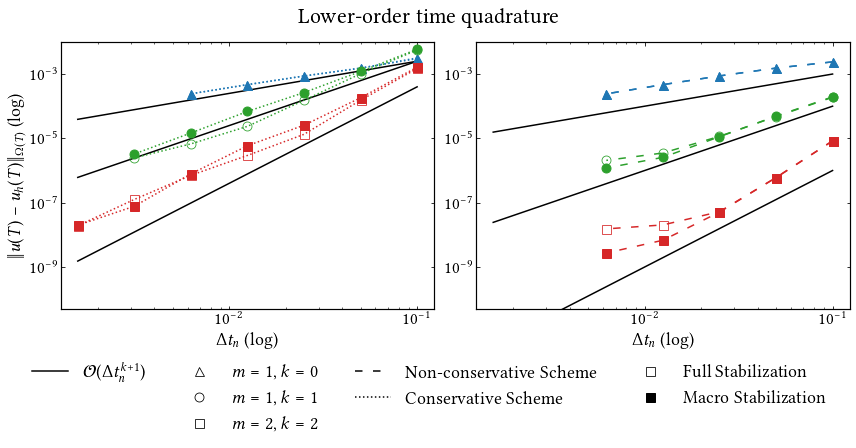

In [7]:

""" L2 vs dt """
### with normal quadrature order

# h = 0.005, nx = ny = 201

# P0P1, n = 3
error_conservative_P0P1_macro = [0.003176861088117188, 0.001527496688651269, 0.0008687325649048555, 0.0004671653112662256, 0.0002422253627057125]
error_conservative_P0P1_fullstab = [0.003009634945274748, 0.001523543527794882, 0.0008699186260096819, 0.0004677703083672906, 0.0002425343887784299]

error_classical_P0P1_macro = [0.002391152413778875, 0.00153045699868446, 0.00087287387519328, 0.0004674646800051914, 0.0002423016619667762]
error_classical_P0P1_fullstab = [0.002389220003542316, 0.001530596926512915, 0.0008732505096759034, 0.0004677907267248872, 0.0002425199307744222]

# P1 P1, n = 3
error_classical_P1P1_macro = [0.0001948862885002824, 4.909174317812143e-05, 1.123721880102907e-05, 2.563108384951002e-06, 1.19884408538203e-06]
error_classical_P1P1_fullstab = [0.0001894372912046837, 4.763599126119256e-05, 1.155028200839513e-05, 3.505661568151647e-06, 2.068842994145333e-06]
cond_classical_P1P1_fullstab = [4.729573e+05,1.344393e+05,5.525427e+04,2.658759e+04,1.372433e+04]

error_conservative_P1P1_macro = [0.00588741263673301, 0.001202737636059589, 0.0002655557565116284, 6.868483426363614e-05, 1.469821654382444e-05, 3.275903959046383e-06]
cond_conservative_P1P1_macro = [1.608482e+06,5.570517e+05,2.319938e+05,1.186097e+05,5.379258e+04]
error_conservative_P1P1_fullstab = [0.005581422156695842, 0.001020433012071045, 0.0001527009095028262, 2.361617900684426e-05, 6.733661582539843e-06, 2.485044966158776e-06]
cond_conservative_P1P1_fullstab = [9.370592e+05,2.198378e+05,7.089865e+04,2.967157e+04,1.439205e+04]


# P2 P2
error_classical_P2P2_macro = [8.332566469846232e-06, 6.041741940940425e-07, 5.077054853520712e-08, 6.788255783738647e-09, 2.722429456330098e-09]
cond_classical_P2P2_macro = [4.965193e+10,1.821922e+10,9.906596e+09,8.943915e+09,3.388502e+09]

error_classical_P2P2_fullstab = [8.354027190762261e-06, 5.999276265518835e-07, 5.243869399413936e-08, 2.033277540945095e-08, 1.53068328858331e-08]

# n = 5
error_conservative_P2P2_macro = [0.001639019702577382, 0.0001823522938820828, 2.566360207164428e-05, 5.894405545087339e-06, 7.86182323330281e-07, 7.726404235498557e-08, 1.985433878530719e-08]#[0.001639019702577382, 0.0001823522938820828, 2.566360207164428e-05, 5.894405545087339e-06, 7.86182323330281e-07, 2.638313685419579e-07]
cond_conservative_P2P2_macro = [8.969031e+10,2.916841e+10,1.346534e+10,1.049788e+10,3.348970e+09]

error_conservative_P2P2_fullstab = [0.001486631966733258, 0.0001536160239168151, 1.334660187226042e-05, 2.943325006000014e-06, 7.08617148743233e-07, 1.260643485015267e-07, 1.91389468970133e-08]#[0.001486631966733258, 0.0001536160239168151, 1.334660187226042e-05, 2.943325006000014e-06, 7.08617148743233e-07, 3.214239191639807e-07]


dt = [0.1, 0.05, 0.025, 0.0125, 0.00625, 0.003125, 0.0015625]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

ax1.loglog(dt, 0.25e-1*np.power(dt, 1), linestyle="-", color="black")  
ax1.loglog(dt, 0.25e-0*np.power(dt, 2), linestyle="-", color="black")  
ax1.loglog(dt, .4e-0*np.power(dt, 3), linestyle="-", color="black") 
#ax1.loglog(dt, 1.e-2*np.power(dt, 4), linestyle="-", color="black")  

ax1.loglog(dt[:-2], error_conservative_P0P1_macro, marker='^', markersize=9, linestyle=":", color="C0")
ax1.loglog(dt[:-2], error_conservative_P0P1_fullstab, marker='^', markersize=9, linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C0")
ax1.loglog(dt[:-1], error_conservative_P1P1_fullstab, marker='o', markersize=9, linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C2")
ax1.loglog(dt[:-1], error_conservative_P1P1_macro, marker='o', markersize=9, linestyle=":", color="C2")
ax1.loglog(dt, error_conservative_P2P2_fullstab, marker='s', markersize=9, linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C3")
ax1.loglog(dt, error_conservative_P2P2_macro, marker='s', markersize=9, linestyle=":", color="C3")

ax1.set_ylim(0.5e-10, 1e-2)
ax1.set_xlabel(r"$\Delta t_n$ (log)", fontsize=18)
ax1.tick_params(axis='both', which='major', labelsize=17)
ax1.set_ylabel(r"$\|u(T)-u_h(T)\|_{\Omega(T)}$ (log)", fontsize=18)


ax2.loglog(dt, 0.1e-1*np.power(dt, 1), linestyle="-", color="black")  
ax2.loglog(dt, 1e-2*np.power(dt, 2), linestyle="-", color="black")  
ax2.loglog(dt, 1.e-3*np.power(dt, 3), linestyle="-", color="black") 

#ax2.loglog([],[], label=r"$\mathcal{O}(h^{k+1})$", linestyle="-", color="black")

ax2.loglog(dt[:-2], error_classical_P0P1_fullstab, marker='^', markersize=9, linestyle=(0, (5,7)), markeredgewidth=0.8, markerfacecolor="None", color="C0")
ax2.loglog(dt[:-2], error_classical_P0P1_macro, marker='^', markersize=9, linestyle=(0, (5,7)), color="C0")
ax2.loglog(dt[:-2], error_classical_P1P1_fullstab, marker='o', markersize=9, linestyle=(0, (5,7)), markeredgewidth=0.8, markerfacecolor="None", color="C2")
ax2.loglog(dt[:-2], error_classical_P1P1_macro, marker='o', markersize=9, linestyle=(0, (5,7)), color="C2")
ax2.loglog(dt[:-2], error_classical_P2P2_fullstab, marker='s', markersize=9, linestyle=(0, (5,7)), markeredgewidth=0.8, markerfacecolor="None", color="C3")
ax2.loglog(dt[:-2], error_classical_P2P2_macro, marker='s', markersize=9, linestyle=(0, (5,7)), color="C3")

#ax1.loglog(dt[:-2], error_classical_P3P3_fullstab, marker='s', markersize=9, linestyle=(0, (5,7)), markeredgewidth=0.8, markerfacecolor="None", color="C4")

ax2.loglog([],[], label=r"$\mathcal{O}(\Delta t_n^{k+1})$", linestyle="-", color="black")
ax2.loglog([], [], label=" ", linestyle="None")
ax2.loglog([],[], linestyle="None", label=" ")
ax2.loglog([],[], linestyle="None",  marker='^', markersize=9, markeredgewidth=0.8, markerfacecolor="None", color="black", label=r"$m=1, k=0$")
ax2.loglog([],[], linestyle="None",  marker='o', markersize=9, markeredgewidth=0.8, markerfacecolor="None", color="black", label=r"$m=1, k=1$")
ax2.loglog([],[], linestyle="None",  marker='s', markersize=9, markeredgewidth=0.8, markerfacecolor="None", color="black", label=r"$m=2, k=2$")
#ax2.loglog([],[], linestyle="None", label=" ")
ax2.loglog([],[], linestyle=(0, (5,7)), color="black",label=r"Non-conservative Scheme")
ax2.loglog([],[], linestyle=":", color="black", label=r"Conservative Scheme")
#ax2.loglog([],[], linestyle="None", label=" ")
ax2.loglog([],[], linestyle="None",  marker='s', markersize=9, markeredgewidth=0.8, markerfacecolor="None", color="black", label=r"Full Stabilization")
ax2.loglog([],[], linestyle="None",  marker='s', markersize=9, color="black", label=r"Macro Stabilization")

ax2.set_ylim(0.5e-10, 1e-2)
ax2.set_xlabel(r"$\Delta t_n$ (log)", fontsize=18)
ax2.tick_params(axis='both', which='major', labelsize=17)
# ax2.set_ylabel(r"Condition Number (log)", fontsize=18)
#fig.suptitle(r"$L^2$-error vs $\Delta t_n$, $h=0.005$", fontsize=22)
fig.suptitle(r"Lower-order time quadrature", fontsize=22)
handles, labels = [(a + b) for a, b in zip(ax1.get_legend_handles_labels(), ax2.get_legend_handles_labels())]
fig.legend(handles, labels, loc='lower center', ncols=4, bbox_to_anchor=(0.5, -0.25), fontsize=18, frameon=False)
plt.tight_layout()
plt.show()



### With higher quadrature order

# P0P1

# h = 0.005, tau_1 = 0.1, n = 4
# error_conservative_P0P1_macro = 
# error_conservative_P0P1_fullstab =

# error_classical_P0P1_macro = 
# error_classical_P0P1_fullstab = 

# P1 P1

# h = 0.005, nx = ny = 201, n = 5
# error_classical_P1P1_macro = 
# error_classical_P1P1_fullstab =

# error_conservative_P1P1_macro =
# error_conservative_P1P1_fullstab =


# h = 0.005, n = 7

# P2 P2
#error_classical_P2P2_macro = 
#error_classical_P2P2_fullstab = 

# error_conservative_P2P2_macro = 
# error_conservative_P2P2_fullstab =

# dt = [0.1, 0.05, 0.025, 0.0125, 0.00625, 0.003125, 0.0015625]   #[0.1, 0.05, 0.025, 0.0125, 0.00625, 0.00454]


# fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# ax1.loglog(dt, 0.25e-1*np.power(dt, 1), linestyle="-", color="black")  
# ax1.loglog(dt, 0.25e-0*np.power(dt, 2), linestyle="-", color="black")  
# ax1.loglog(dt, .4e-0*np.power(dt, 3), linestyle="-", color="black") 
# ax1.loglog(dt, error_conservative_P2P2_fullstab, marker='s', markersize=9, linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C3")
# ax1.loglog(dt, error_conservative_P2P2_macro, marker='s', markersize=9, linestyle=":", color="C3")
# ax1.set_ylim(0.5e-10, 1e-2)
# ax1.set_xlabel(r"$\Delta t_n$ (log)", fontsize=18)
# ax1.tick_params(axis='both', which='major', labelsize=17)
# ax1.set_ylabel(r"$\|u(T)-u_h(T)\|_{\Omega(T)}$ (log)", fontsize=18)


# ax2.loglog(dt, 0.1e-1*np.power(dt, 1), linestyle="-", color="black")  
# ax2.loglog(dt, 1e-2*np.power(dt, 2), linestyle="-", color="black")  
# ax2.loglog(dt, 1.e-3*np.power(dt, 3), linestyle="-", color="black") 
# ax2.loglog([],[], label=r"$\mathcal{O}(\Delta t_n^{k+1})$", linestyle="-", color="black")
# ax2.loglog([], [], label=" ", linestyle="None")
# ax2.loglog([],[], linestyle="None", label=" ")
# ax2.loglog([],[], linestyle="None",  marker='^', markersize=9, markeredgewidth=0.8, markerfacecolor="None", color="black", label=r"$m=1, k=0$")
# ax2.loglog([],[], linestyle="None",  marker='o', markersize=9, markeredgewidth=0.8, markerfacecolor="None", color="black", label=r"$m=1, k=1$")
# ax2.loglog([],[], linestyle="None",  marker='s', markersize=9, markeredgewidth=0.8, markerfacecolor="None", color="black", label=r"$m=2, k=2$")
# ax2.loglog([],[], linestyle=(0, (5,7)), color="black",label=r"Non-conservative Scheme")
# ax2.loglog([],[], linestyle=":", color="black", label=r"Conservative Scheme")
# ax2.loglog([],[], linestyle="None",  marker='s', markersize=9, markeredgewidth=0.8, markerfacecolor="None", color="black", label=r"Full Stabilization")
# ax2.loglog([],[], linestyle="None",  marker='s', markersize=9, color="black", label=r"Macro Stabilization")
# ax2.set_ylim(0.5e-10, 1e-2)
# ax2.set_xlabel(r"$\Delta t_n$ (log)", fontsize=18)
# ax2.tick_params(axis='both', which='major', labelsize=17)
# # ax2.set_ylabel(r"Condition Number (log)", fontsize=18)
# fig.suptitle(r"Higher-order time quadrature", fontsize=22)
# handles, labels = [(a + b) for a, b in zip(ax1.get_legend_handles_labels(), ax2.get_legend_handles_labels())]
# fig.legend(handles, labels, loc='lower center', ncols=4, bbox_to_anchor=(0.5, -0.25), fontsize=18, frameon=False)
# plt.tight_layout()
# plt.show()

### 6. Conservation error for conservative (left) and non-conservative (right) schemes in last time point vs $h$.

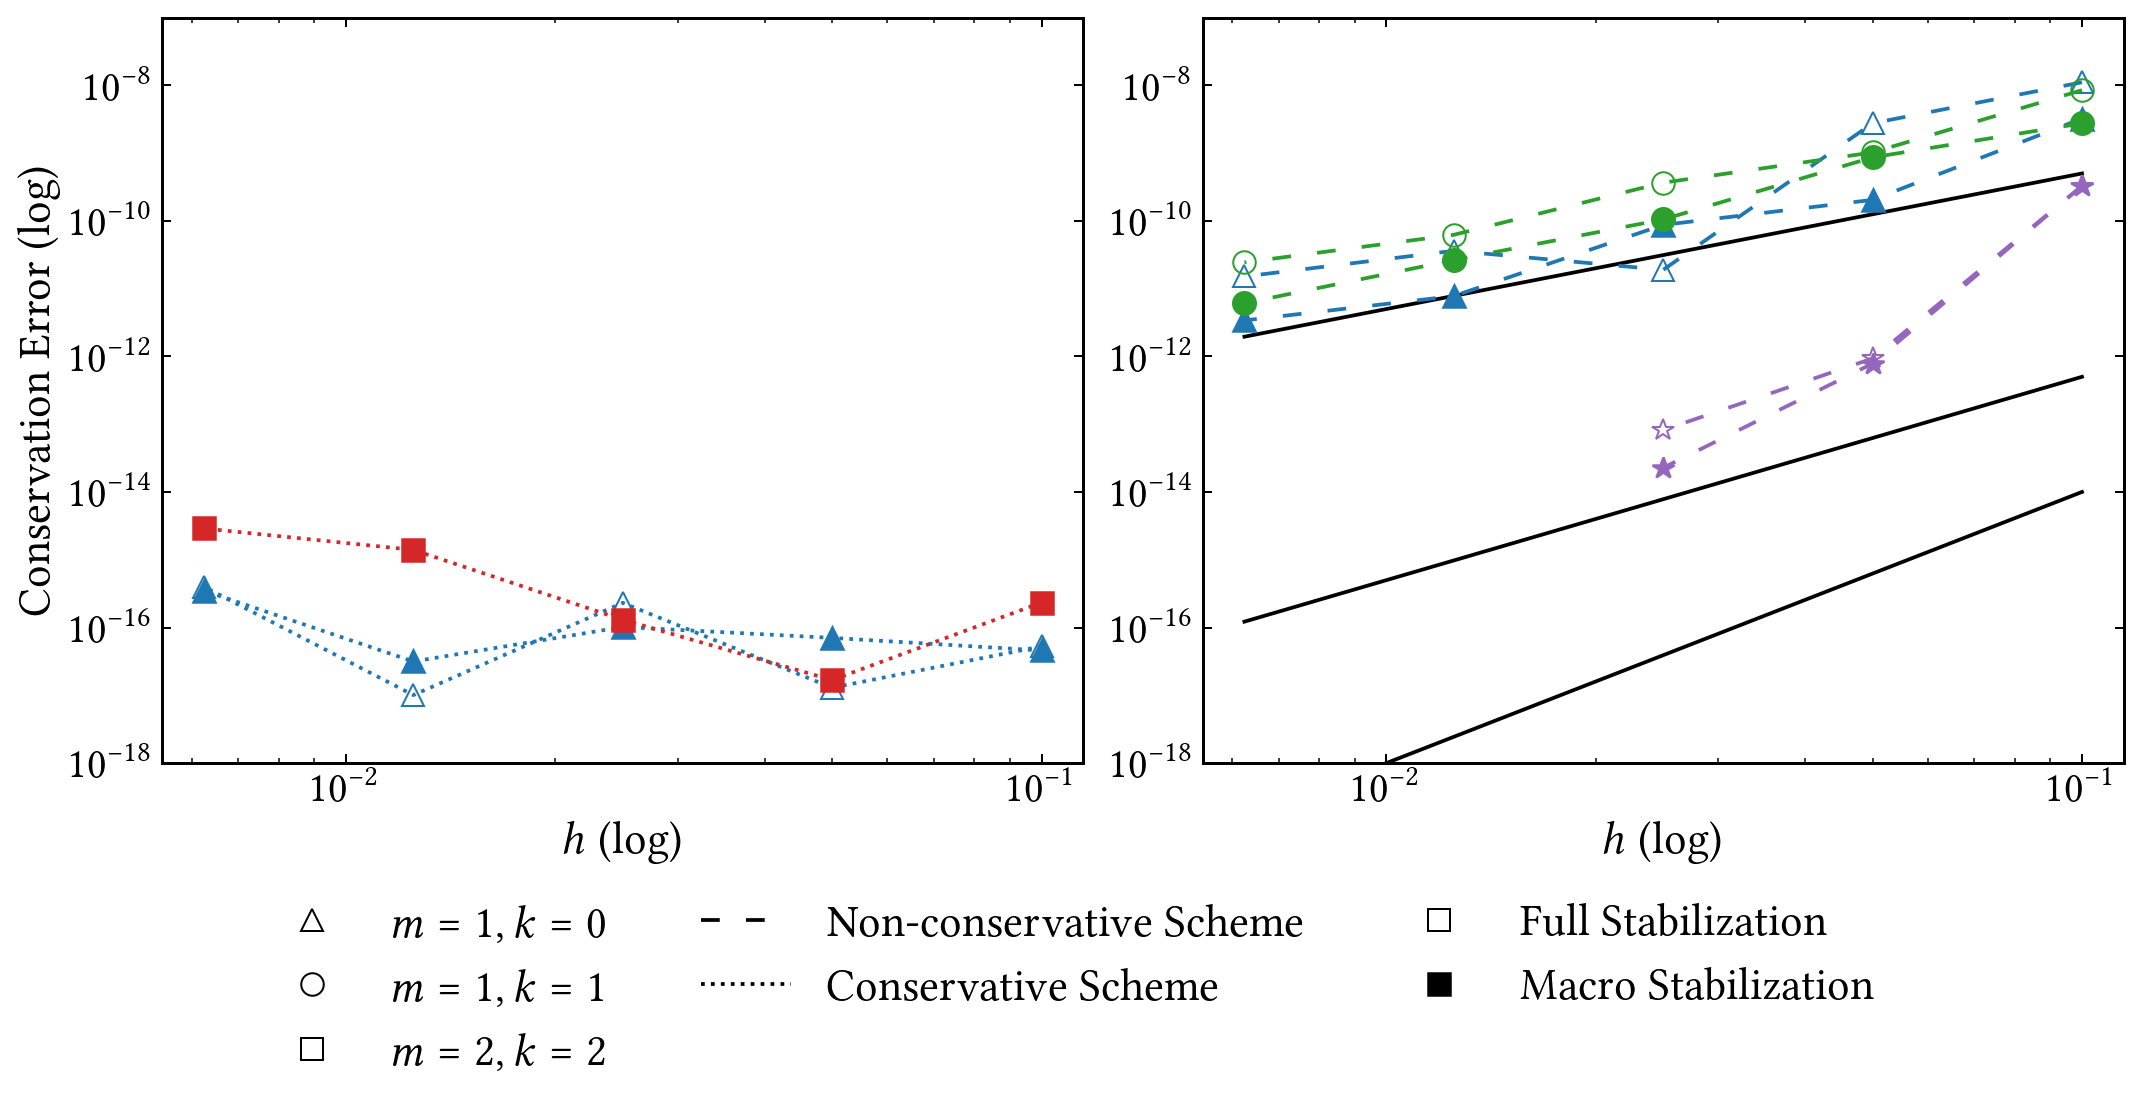

In [9]:

error_conservative_P0P1_fullstab = [5.280403393183308e-17, 1.293419310457317e-17, 2.311948900959827e-16, 1.00754039680307e-17, 3.985281811199807e-16]
error_conservative_P0P1_macro = [4.586514002792585e-17, 7.033253374231357e-17, 1.018720172915643e-16, 3.155795945541267e-17, 3.499559237926301e-16]
# error_conservative_P1P1_fullstab = 
# error_conservative_P1P1_macro = 
# error_conservative_P2P2_fullstab = 
error_conservative_P2P2_macro = [2.335778055348459e-16, 1.678649894868572e-17, 1.301546591586222e-16, 1.39702853938414e-15, 2.893564378594458e-15]  
                                
error_classical_P0P1_fullstab = [1.107459959577467e-08, 2.752354836155308e-09, 1.8931990133191e-11, 3.616512331259579e-11, 1.510295059872924e-11]
error_classical_P0P1_macro = [3.225771923119186e-09, 2.039422163370002e-10, 8.710088678993236e-11, 7.776726845950667e-12, 3.395842176649564e-12]
error_classical_P1P1_fullstab = [8.468055628998045e-09, 1.021918097810032e-09, 3.654692889896662e-10, 6.220686152289866e-11, 2.435528560798695e-11]
error_classical_P1P1_macro =  [2.742173554961142e-09, 8.63479365342717e-10, 1.048726405626301e-10, 2.637566934291834e-11, 6.085802459450565e-12]
# error_classical_P2P2_fullstab = 
# error_classical_P2P2_macro = 

error_classical_P3P3_fullstab = [3.26627673950179e-10, 9.331245442268732e-13, 8.188063239112091e-14]    # h = 0.1, 0.05, 0.025
error_classical_P3P3_macro = [3.272531874800406e-10, 7.855481486785743e-13, 2.27404396481196e-14]

# Conservation vs h
h = [0.1, 0.05, 0.025, 0.0125, 0.00625]


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

ax1.loglog(h, error_conservative_P0P1_fullstab, marker='^', markersize=9, linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C0")
ax1.loglog(h, error_conservative_P0P1_macro, marker='^', markersize=9, linestyle=":", color="C0")
#ax1.loglog(h, error_conservative_P1P1_fullstab, marker='o', markersize=9, linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C2")
#ax1.loglog(h, error_conservative_P1P1_macro, marker='o', markersize=9, linestyle=":", color="C2")
#ax1.loglog(h, error_conservative_P2P2_fullstab, marker='s', markersize=9, linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C3")
ax1.loglog(h, error_conservative_P2P2_macro, marker='s', markersize=9, linestyle=":", color="C3")


ax1.set_xlabel(r"$h$ (log)", fontsize=18)
ax1.tick_params(axis='both', which='major', labelsize=17)
ax1.set_ylabel(r"Conservation Error (log)", fontsize=18)
ax1.set_ylim(1e-18, 1e-7)

ax2.loglog(h, 0.5e-7*np.power(h, 2), linestyle="-", color="black")  
ax2.loglog(h, 0.5e-9*np.power(h, 3), linestyle="-", color="black")  
ax2.loglog(h, 1.e-10*np.power(h, 4), linestyle="-", color="black")  
ax2.loglog(h, error_classical_P0P1_fullstab, marker='^', markersize=9, linestyle=(0, (5,7)), markeredgewidth=0.8, markerfacecolor="None", color="C0")
ax2.loglog(h, error_classical_P0P1_macro, marker='^', markersize=9, linestyle=(0, (5,7)), color="C0")
ax2.loglog(h, error_classical_P1P1_fullstab, marker='o', markersize=9, linestyle=(0, (5,7)), markeredgewidth=0.8, markerfacecolor="None", color="C2")
ax2.loglog(h, error_classical_P1P1_macro, marker='o', markersize=9, linestyle=(0, (5,7)), color="C2")
#ax2.loglog(h, error_classical_P2P2_fullstab, marker='s', markersize=9, linestyle=(0, (5,7)), markeredgewidth=0.8, markerfacecolor="None", color="C3")
#ax2.loglog(h, error_classical_P2P2_macro, marker='s', markersize=9, linestyle=(0, (5,7)), color="C3")

ax2.loglog(h[:-2], error_classical_P3P3_fullstab, marker='*', markersize=9, linestyle=(0, (5,7)), markeredgewidth=0.8, markerfacecolor="None", color="C4")
ax2.loglog(h[:-2], error_classical_P3P3_macro, marker='*', markersize=9, linestyle=(0, (5,7)), color="C4")



# ax2.loglog([],[], label=r"$\mathcal{O}(h^{k+1})$", linestyle="-", color="black")
# ax2.loglog(h, 3e7*np.power(h, -2), label=r"$\mathcal{O}(h^{-2})$", linestyle="-.", color="black")
#ax2.loglog([],[], linestyle="None", label=" ")
ax2.loglog([],[], linestyle="None",  marker='^', markersize=9, markeredgewidth=0.8, markerfacecolor="None", color="black", label=r"$m=1, k=0$")
ax2.loglog([],[], linestyle="None",  marker='o', markersize=9, markeredgewidth=0.8, markerfacecolor="None", color="black", label=r"$m=1, k=1$")
ax2.loglog([],[], linestyle="None",  marker='s', markersize=9, markeredgewidth=0.8, markerfacecolor="None", color="black", label=r"$m=2, k=2$")
#ax2.loglog([],[], linestyle="None", label=" ")
ax2.loglog([],[], linestyle=(0, (5,7)), color="black",label=r"Non-conservative Scheme")
ax2.loglog([],[], linestyle=":", color="black", label=r"Conservative Scheme")
ax2.loglog([],[], linestyle="None", label=" ")
ax2.loglog([],[], linestyle="None",  marker='s', markersize=9, markeredgewidth=0.8, markerfacecolor="None", color="black", label=r"Full Stabilization")
ax2.loglog([],[], linestyle="None",  marker='s', markersize=9, color="black", label=r"Macro Stabilization")

# ax2.loglog(h, cond_conservative_P0P1_fullstab, marker='^', markersize=9, linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C0")
# ax2.loglog(h, cond_conservative_P0P1_macro, marker='^', markersize=9, linestyle=":", color="C0")
# ax2.loglog(h, cond_conservative_P1P1_fullstab, marker='o', markersize=9, linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C2")
# ax2.loglog(h, cond_conservative_P1P1_macro, marker='o', markersize=9, linestyle=":", color="C2")
# ax2.loglog(h, cond_conservative_P2P2_fullstab, marker='s', markersize=9, linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C3")
# ax2.loglog(h, cond_conservative_P2P2_macro, marker='s', markersize=9, linestyle=":", color="C3")

# ax2.loglog(h, cond_classical_P0P1_fullstab, marker='^', markersize=9, linestyle=(0, (5,7)), markeredgewidth=0.8, markerfacecolor="None", color="C0")
# ax2.loglog(h, cond_classical_P0P1_macro, marker='^', markersize=9, linestyle=(0, (5,7)), color="C0")
# ax2.loglog(h, cond_classical_P1P1_fullstab, marker='o', markersize=9, linestyle=(0, (5,7)), markeredgewidth=0.8, markerfacecolor="None", color="C2")
# ax2.loglog(h, cond_classical_P1P1_macro, marker='o', markersize=9, linestyle=(0, (5,7)), color="C2")
# ax2.loglog(h, cond_classical_P2P2_fullstab, marker='s', markersize=9, linestyle=(0, (5,7)), markeredgewidth=0.8, markerfacecolor="None", color="C3")
# ax2.loglog(h, cond_classical_P2P2_macro, marker='s', markersize=9, linestyle=(0, (5,7)), color="C3")

ax2.set_xlabel(r"$h$ (log)", fontsize=18)
ax2.tick_params(axis='both', which='major', labelsize=17)
ax2.set_ylim(1e-18, 1e-7)
#ax2.set_ylabel(r"Condition Number (log)", fontsize=18)
handles, labels = [(a + b) for a, b in zip(ax1.get_legend_handles_labels(), ax2.get_legend_handles_labels())]
fig.legend(handles, labels, loc='lower center', ncols=3, bbox_to_anchor=(0.5, -0.25), fontsize=18, frameon=False)
plt.tight_layout()
plt.show()


### Reynold and $L^2$ errors dependency on polynomial orders
We fix N = 7 and show Reynold error, conservative error and classical error vs $h$, for P0xP1, P1xP1, P2xP2, and P3xP3.

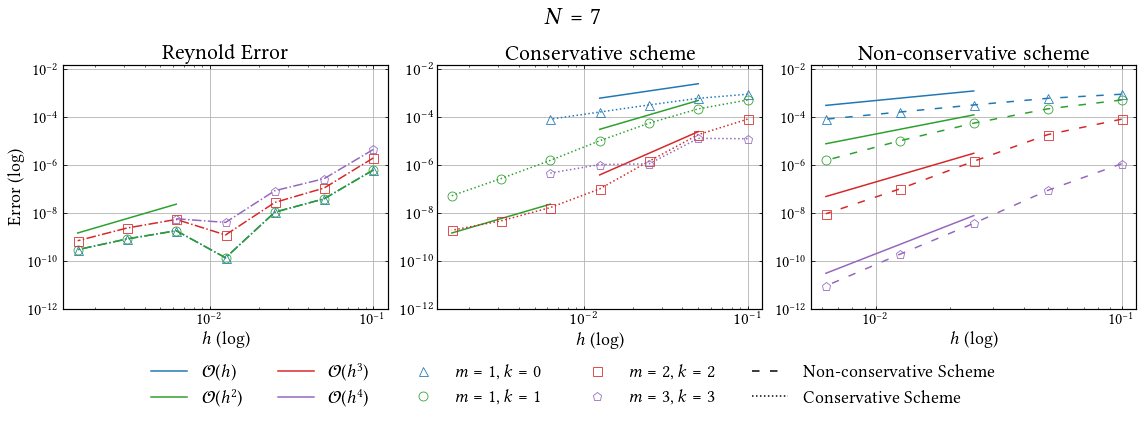

In [46]:
# N = 7, tau=0.1 always. We use exact functions and patch stabilization

# P0xP1
error_P0P1_conservative_fullstab = [0.0009134220767189186, 0.0006160471206832456, 0.0003257068598439143, 0.0001647592071663579, 8.287457926930881e-05]
error_P0P1_classical_fullstab = [0.0009133409282382035, 0.000616060343303375, 0.000325703697731971, 0.0001647598405376617, 8.287452531462515e-05]
reynold_P0P1_fullstab = [6.310104523586657e-07, 3.893919057909676e-08, 1.105961358376041e-08, 1.353764256050534e-10, 1.832558535904907e-09, 8.2829882194871e-10, 2.957435723730236e-10] #[6.30920892443626e-07, 3.894064571377488e-08, 1.105940041801234e-08, 1.353765930668552e-10, 1.832585078095661e-09]



wrongsignonbeta = [0.002767156143007177, 0.0005972251755695361, 0.0001825260304846893, 4.675827688423226e-05, 1.176664202382777e-05]
rightsignonbetal2 = [8.40713570315777e-07, 5.039671523547709e-08, 1.399756392431073e-08, 2.738653815145574e-10, 2.706661516569004e-09]
wrongsignonbetal2 = [0.004987406805173758, 0.001742114893038067, 0.0006299151032291327, 0.0002225404516068289, 7.890089807086903e-05]



# P1xP1

error_P1P1_conservative_fullstab  = [0.0005250793572275482, 0.0002234141140080464, 5.649519740616011e-05, 1.038487170023933e-05, 1.581766553222198e-06, 2.747118903767437e-07, 5.278326386055427e-08]
error_P1P1_classical_fullstab = [0.0005253491733271603, 0.0002235066885724918, 5.650660531881953e-05, 1.03849847652964e-05, 1.583086344448946e-06]
reynold_P1P1_fullstab = [6.33612679170302e-07, 3.987994324514437e-08, 1.069590588101128e-08, 1.351846972105536e-10, 1.82246209026712e-09, 8.258999541844029e-10, 2.951631317433747e-10] 

wrongsignonbeta = [0.002774407128897175, 0.0005968921167447055, 0.0001823425257354565, 4.67128946465168e-05, 1.175902591778919e-05]

# P2xP2
error_P2P2_conservative_fullstab  = [8.324984846093899e-05, 1.874750376523884e-05, 1.451323979738203e-06, 1.017748154796318e-07, 1.691771129644032e-08, 4.729113739072425e-09, 1.905571249446853e-09]
error_P2P2_classical_fullstab = [8.310053774416106e-05, 1.87508868594883e-05, 1.450976234462316e-06, 1.014903501174667e-07, 9.338320676929028e-09]
reynold_P2P2_fullstab = [2.007452699151328e-06, 1.107193022397692e-07, 2.775232371662791e-08, 1.216706346463073e-09, 5.407008526067566e-09, 2.362009891874598e-09, 6.967694893127575e-10]


# P3xP3
error_P3P3_conservative_fullstab  = [1.2652e-05, 1.31197e-05, 1.1286e-06, 1.055095e-06, 4.6648e-07]
error_P3P3_classical_fullstab = [1.148709847588146e-06, 8.847692334708781e-08, 3.711477780872387e-09, 1.89966734894353e-10, 9.03541893997661e-12]
reynold_P3P3_fullstab = [4.534517234052349e-06, 2.726885483016406e-07, 8.561535231800695e-08, 4.058960828628494e-09, 5.767659433933162e-09]



hext = [0.1, 0.05, 0.025, 0.0125, 0.00625, 0.003125, 0.0015625]
h = [0.1, 0.05, 0.025, 0.0125, 0.00625]


fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16, 5))

ax1.loglog(hext[-3:], 0.6e-3*np.power(hext[-3:], 2), linestyle="-", color="C2")  
#ax1.loglog(h, 0.2e-4*np.power(h, 3), linestyle="-", color="black")  
#ax1.loglog(h, 1.e-8*np.power(h, 4), linestyle="-", color="black")  

ax1.loglog(hext, reynold_P0P1_fullstab, marker='^', markersize=9, linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C0")
ax1.loglog(hext, reynold_P1P1_fullstab, marker='o', markersize=9, linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C2")
ax1.loglog(hext, reynold_P2P2_fullstab, marker='s', markersize=9, linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C3")
ax1.loglog(h, reynold_P3P3_fullstab, marker='p', markersize=9, linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C4")
# ax1.loglog(h, wrongsignonbeta)
# ax1.loglog(h, wrongsignonbetal2)
# ax1.loglog(h, rightsignonbetal2)
#ax1.grid()

ax1.set_ylim(1e-12, 1.5e-2)
ax1.set_xlabel(r"$h$ (log)")
ax1.tick_params(axis='both', which='major')
ax1.set_ylabel(r"Error (log)")
ax1.set_title(r"Reynold Error")

ax2.loglog(h[1:-1], 0.5e-1*np.power(h[1:-1], 1), linestyle="-", color="C0")
ax2.loglog(h[1:-1], 0.2e-0*np.power(h[1:-1], 2), linestyle="-", color="C2")  
ax2.loglog(h[1:-1], 0.2e-0*np.power(h[1:-1], 3), linestyle="-", color="C3")  
ax2.loglog(hext[-3:], 0.6e-3*np.power(hext[-3:], 2), linestyle="-", color="C2")   

ax2.loglog(h, error_P0P1_conservative_fullstab, marker='^', markersize=9, linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C0")
ax2.loglog(hext, error_P1P1_conservative_fullstab, marker='o', markersize=9, linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C2")
ax2.loglog(hext, error_P2P2_conservative_fullstab, marker='s', markersize=9, linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C3")
ax2.loglog(h, error_P3P3_conservative_fullstab, marker='p', markersize=9, linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C4")

ax1.grid()
ax2.loglog([],[], label=r"$\mathcal{O}(h)$", linestyle="-", color="C0")
ax2.loglog([],[], label=r"$\mathcal{O}(h^{2})$", linestyle="-", color="C2")
ax2.loglog([],[], linestyle="None", label=" ")
ax2.loglog([],[], label=r"$\mathcal{O}(h^{3})$", linestyle="-", color="C3")
ax2.loglog([],[], label=r"$\mathcal{O}(h^{4})$", linestyle="-", color="C4")
ax2.loglog([],[], linestyle="None", label=" ")
ax2.loglog([],[], linestyle="None",  marker='^', markersize=9, markeredgewidth=0.8, markerfacecolor="None", color="C0", label=r"$m=1, k=0$")
ax2.loglog([],[], linestyle="None",  marker='o', markersize=9, markeredgewidth=0.8, markerfacecolor="None", color="C2", label=r"$m=1, k=1$")
ax2.loglog([],[], linestyle="None", label=" ")
ax2.loglog([],[], linestyle="None",  marker='s', markersize=9, markeredgewidth=0.8, markerfacecolor="None", color="C3", label=r"$m=2, k=2$")
ax2.loglog([],[], linestyle="None",  marker='p', markersize=9, markeredgewidth=0.8, markerfacecolor="None", color="C4", label=r"$m=3, k=3$")
ax2.loglog([],[], linestyle="None", label=" ")

ax2.loglog([],[], linestyle=(0, (5,7)), color="black",label=r"Non-conservative Scheme")
ax2.loglog([],[], linestyle=":", color="black", label=r"Conservative Scheme")
# ax2.loglog([],[], linestyle="None",  marker='s', markersize=9, markeredgewidth=0.8, markerfacecolor="None", color="black", label=r"Full Stabilization")
# ax2.loglog([],[], linestyle="None",  marker='s', markersize=9, color="black", label=r"Macro Stabilization")

ax2.set_xlabel(r"$h$ (log)", fontsize=18)
ax2.tick_params(axis='both', which='major', labelsize=17)
ax2.set_ylim(1e-12, 1.5e-2)
ax2.set_title(r"Conservative scheme")
ax2.grid()

ax3.loglog(h[2:], 0.5e-1*np.power(h[2:], 1), linestyle="-", color="C0")
ax3.loglog(h[2:], 0.2e-0*np.power(h[2:], 2), linestyle="-", color="C2")  
ax3.loglog(h[2:], 0.2e-0*np.power(h[2:], 3), linestyle="-", color="C3")   
ax3.loglog(h[2:], 0.2e-1*np.power(h[2:], 4), linestyle="-", color="C4") 

ax3.loglog(h, error_P0P1_classical_fullstab, marker='^', markersize=9, linestyle=(0, (5,7)), markeredgewidth=0.8, markerfacecolor="None", color="C0")
ax3.loglog(h, error_P1P1_classical_fullstab, marker='o', markersize=9, linestyle=(0, (5,7)), markeredgewidth=0.8, markerfacecolor="None", color="C2")
ax3.loglog(h, error_P2P2_classical_fullstab, marker='s', markersize=9, linestyle=(0, (5,7)), markeredgewidth=0.8, markerfacecolor="None", color="C3")
ax3.loglog(h, error_P3P3_classical_fullstab, marker='p', markersize=9, linestyle=(0, (5,7)), markeredgewidth=0.8, markerfacecolor="None", color="C4")

ax3.set_ylim(1e-12, 1.5e-2)
ax3.set_xlabel(r"$h$ (log)", fontsize=18)
ax3.set_title(r"Non-conservative scheme")
ax3.grid()

handles, labels = [(a + b + c) for a, b, c in zip(ax1.get_legend_handles_labels(), ax2.get_legend_handles_labels(), ax3.get_legend_handles_labels())]
fig.legend(handles, labels, loc='lower center', ncols=5, bbox_to_anchor=(0.5, -0.25), fontsize=18, frameon=False)
fig.suptitle(r"$N=7$", fontsize=24)
#ax2.grid()
plt.tight_layout()
plt.show()

### Reynold and $L^2$ errors dependency on quadrature order
We plot Reynold error vs $h$ with different quadrature orders for different polynomials orders. 

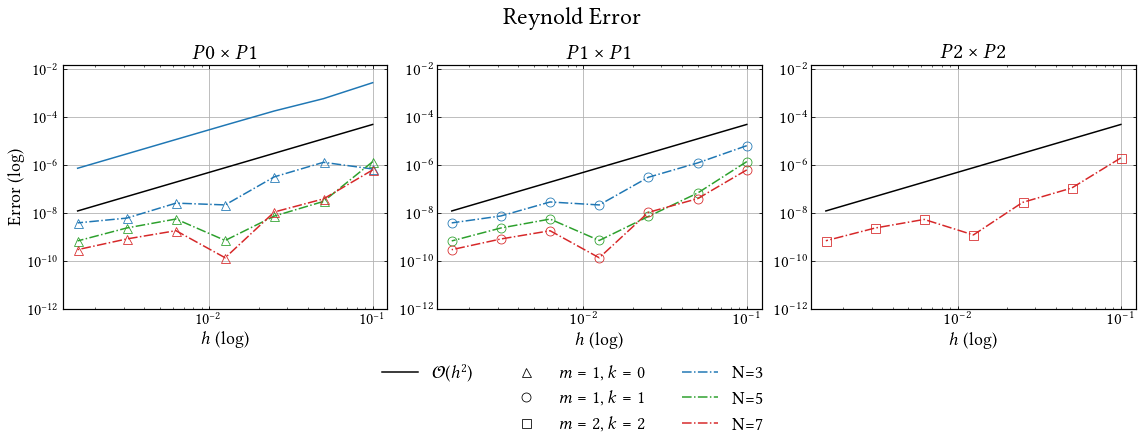

In [11]:
# P0xP1

# N = 3
reynold_P0P1_fullstab_N3 = [6.89701545694265e-07, 1.31094533823258e-06, 3.24468370581352e-07, 2.181314519745533e-08, 2.590502149576409e-08, 6.144877368230723e-09, 3.880584961691622e-09]
wrongsignonbeta = [0.002768043798680571, 0.0005972329629397983, 0.0001825404350664982, 4.677958680297107e-05, 1.177921971674001e-05, 2.951395078031945e-06, 7.410187307209411e-07]

# N = 5
reynold_P0P1_fullstab_N5 = [1.39391798751904e-06, 3.052143774664399e-08, 7.455237479401665e-09, 7.154626648685843e-10, 5.627241996454246e-09, 2.379970222563779e-09, 6.85892108876413e-10]

# N = 7
reynold_P0P1_fullstab_N7 = [6.310104523586657e-07, 3.893919057909676e-08, 1.105961358376041e-08, 1.353764256050534e-10, 1.832558535904907e-09, 8.2829882194871e-10, 2.957435723730236e-10]



# P1xP1

# N = 3
reynold_P1P1_fullstab_N3 = [6.499301561367566e-06, 1.233866346713884e-06, 3.117615374852032e-07, 2.177280532830814e-08, 2.89558785433807e-08, 7.545648191406494e-09, 3.874010507219458e-09]
# N = 5
reynold_P1P1_fullstab_N5 = [1.405630044993503e-06, 6.821688482333696e-08, 7.202676221497082e-09, 7.144613241007397e-10, 5.596866776257267e-09, 2.37254556306643e-09, 6.847391655389993e-10]

# N = 7 
reynold_P1P1_fullstab_N7 = [6.33612679170302e-07, 3.987994324514437e-08, 1.069590588101128e-08, 1.351846972105536e-10, 1.82246209026712e-09, 8.258999541844029e-10, 2.951631317433747e-10] 



# P2xP2

# N = 3
#reynold_P2P2_fullstab_N3 =

# N = 5
#reynold_P2P2_fullstab_N5 =

# N = 7     

reynold_P2P2_fullstab_N7 = [2.007452699151328e-06, 1.107193022397692e-07, 2.775232371662791e-08, 1.216706346463073e-09, 5.407008526067566e-09, 2.362009891874598e-09, 6.967694893127575e-10]
error_P2P2_fullstab_N7 = [8.324984846093899e-05, 1.874750376523884e-05, 1.451323979738203e-06, 1.017748154796318e-07, 1.691771129644032e-08, 4.729113739072425e-09, 1.905571249446853e-09]



h = [0.1, 0.05, 0.025, 0.0125, 0.00625, 0.003125, 0.0015625]


fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16, 5))

ax1.loglog(h, 0.5e-2*np.power(h, 2), linestyle="-", color="black")  


ax1.loglog(h, reynold_P0P1_fullstab_N3, marker='^', markersize=9, linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C0")
ax1.loglog(h, wrongsignonbeta, color="C0")

ax1.loglog(h, reynold_P0P1_fullstab_N5, marker='^', markersize=9, linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C2")
ax1.loglog(h, reynold_P0P1_fullstab_N7, marker='^', markersize=9, linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C3")


ax1.set_ylim(1e-12, 1.5e-2)
ax1.set_xlabel(r"$h$ (log)")
ax1.tick_params(axis='both', which='major')
ax1.set_ylabel(r"Error (log)")
ax1.set_title(r"$P0\times P1$")
ax1.grid()

ax2.loglog(h, 0.5e-2*np.power(h, 2), linestyle="-", color="black")  

ax2.loglog(h, reynold_P1P1_fullstab_N3, marker='o', markersize=9, linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C0")
ax2.loglog(h, reynold_P1P1_fullstab_N5, marker='o', markersize=9, linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C2")
ax2.loglog(h, reynold_P1P1_fullstab_N7, marker='o', markersize=9, linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C3")


ax2.loglog([],[], label=r"$\mathcal{O}(h^2)$", linestyle="-", color="black")
ax2.loglog([],[], linestyle="None", label=" ")
ax2.loglog([],[], linestyle="None", label=" ")
ax2.loglog([],[], linestyle="None",  marker='^', markersize=9, markeredgewidth=0.8, markerfacecolor="None", color="black", label=r"$m=1, k=0$")
ax2.loglog([],[], linestyle="None",  marker='o', markersize=9, markeredgewidth=0.8, markerfacecolor="None", color="black", label=r"$m=1, k=1$")
ax2.loglog([],[], linestyle="None",  marker='s', markersize=9, markeredgewidth=0.8, markerfacecolor="None", color="black", label=r"$m=2, k=2$")
ax2.loglog([],[], linestyle="-.", color="C0",label=r"N=3")
ax2.loglog([],[], linestyle="-.", color="C2",label=r"N=5")
ax2.loglog([],[], linestyle="-.", color="C3",label=r"N=7")

ax2.set_xlabel(r"$h$ (log)", fontsize=18)
ax2.tick_params(axis='both', which='major', labelsize=17)
ax2.set_ylim(1e-12, 1.5e-2)
ax2.set_title(r"$P1\times P1$")
ax2.grid()

ax3.loglog(h, 0.5e-2*np.power(h, 2), linestyle="-", color="black")  

# ax3.loglog(h, reynold_P2P2_fullstab_N3, marker='s', markersize=9, linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C0")
# ax3.loglog(h, reynold_P2P2_fullstab_N5, marker='s', markersize=9, linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C2")
ax3.loglog(h, reynold_P2P2_fullstab_N7, marker='s', markersize=9, linestyle="-.", markeredgewidth=0.8, markerfacecolor="None", color="C3")


ax3.set_xlabel(r"$h$ (log)", fontsize=18)
ax3.tick_params(axis='both', which='major', labelsize=17)
ax3.set_ylim(1e-12, 1.5e-2)
ax3.set_title(r"$P2\times P2$")

handles, labels = [(a + b) for a, b in zip(ax1.get_legend_handles_labels(), ax2.get_legend_handles_labels())]
ax3.grid()
fig.legend(handles, labels, loc='lower center', ncols=3, bbox_to_anchor=(0.5, -0.25), fontsize=18, frameon=False)
fig.suptitle(r"Reynold Error", fontsize=24)
plt.tight_layout()
plt.show()

### $L^2$-error vs $\Delta t$ for different $h$: example 1
Only conservative method, fullstab

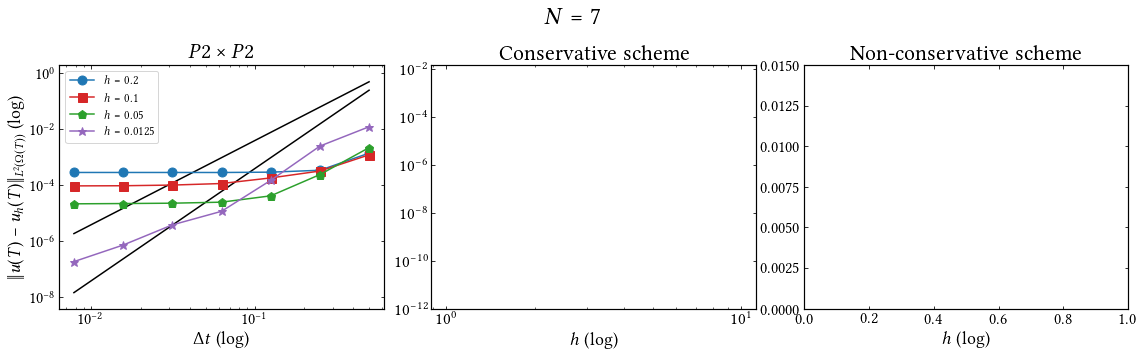

In [3]:
# N = 7

# P2Poly x P2

# h = 0.2
error_P2P2_h02 = [0.001418707434259644, 0.0003471023092307058, 0.000297469874704942, 0.0002891248922070214, 0.0002897361623765272, 0.0002898063589633155, 0.0002899179312374697]

# h = 0.1
error_P2P2_h01 = [0.001231740050936889, 0.0003257677967924826, 0.0001850763149266652, 0.0001167633458525676, 0.0001028516604341269, 9.732936310539482e-05, 9.617999036963214e-05]

# h = 0.05
error_P2P2_h005 = [0.002229247383151428, 0.0002435143201681065, 4.243705696648531e-05, 2.52260955924104e-05, 2.320054867164795e-05, 2.253714987888021e-05, 2.202177530443634e-05]





# h = 0.0125 
error_P2P2_h00125 = [0.01241241322288612, 0.002531183001597701, 0.0001515435759144305, 1.189662906834212e-05, 3.902084002464261e-06, 7.432654283750878e-07, 1.905480873655705e-07]

dt = [0.5, 0.25, 0.125, 0.0625, 0.03125, 0.015625, 0.0078125]
#h = [0.1, 0.05, 0.025, 0.0125, 0.00625]


fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16, 5))

ax1.loglog(dt, 4.*np.power(dt, 3), linestyle="-", color="black")   
ax1.loglog(dt, 4*np.power(dt, 4), linestyle="-", color="black")   

ax1.loglog(dt, error_P2P2_h02, label= r"$h=0.2$", marker='o', markersize=9, linestyle="-", color="C0")
ax1.loglog(dt, error_P2P2_h01, label= r"$h=0.1$", marker='s', markersize=9, linestyle="-", color="C3")
ax1.loglog(dt, error_P2P2_h005, label= r"$h=0.05$", marker='p', markersize=9, linestyle="-", color="C2")
ax1.loglog(dt, error_P2P2_h00125, label= r"$h=0.0125$", marker='*', markersize=9, linestyle="-", color="C4")

#ax1.grid()

ax1.set_ylim(4e-9, 2)
ax1.set_yticks([1e-8, 1e-6, 1e-4, 1e-2, 1e0])
ax1.set_xlabel(r"$\Delta t$ (log)")
ax1.tick_params(axis='both', which='major')
ax1.set_ylabel(r"$\|u(T)-u_h(T)\|_{L^2(\Omega(T))}$ (log)")
ax1.set_title(r"$P2 \times P2$")
ax1.legend()

# ax2.loglog(h[2:], 0.5e-1*np.power(h[2:], 1), linestyle="-", color="C0")
# ax2.loglog(h[2:], 0.2e-0*np.power(h[2:], 2), linestyle="-", color="C2")  
# ax2.loglog(h[2:], 0.2e-0*np.power(h[2:], 3), linestyle="-", color="C3")   
# #ax2.loglog(h, 1.e-8*np.power(h, 4), linestyle="-", color="black") 

# ax2.loglog(h, error_P0P1_conservative_fullstab, marker='^', markersize=9, linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C0")
# ax2.loglog(h, error_P1P1_conservative_fullstab, marker='o', markersize=9, linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C2")
# ax2.loglog(h, error_P2P2_conservative_fullstab, marker='s', markersize=9, linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C3")
# ax2.loglog(h, error_P3P3_conservative_fullstab, marker='p', markersize=9, linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C4")

#ax1.grid()
ax2.loglog([],[], label=r"$\mathcal{O}(h^{2})$", linestyle="-", color="black")
ax2.loglog([],[], linestyle="None", label=" ")
ax2.loglog([],[], linestyle="None", label=" ")
ax2.loglog([],[], linestyle="None",  marker='^', markersize=9, markeredgewidth=0.8, markerfacecolor="None", color="C0", label=r"$m=1, k=0$")
ax2.loglog([],[], linestyle="None",  marker='o', markersize=9, markeredgewidth=0.8, markerfacecolor="None", color="C2", label=r"$m=1, k=1$")
ax2.loglog([],[], linestyle="None", label=" ")
ax2.loglog([],[], linestyle="None",  marker='s', markersize=9, markeredgewidth=0.8, markerfacecolor="None", color="C3", label=r"$m=2, k=2$")
ax2.loglog([],[], linestyle="None",  marker='*', markersize=9, markeredgewidth=0.8, markerfacecolor="None", color="C4", label=r"$m=3, k=3$")
ax2.loglog([],[], linestyle="None", label=" ")

ax2.loglog([],[], linestyle=(0, (5,7)), color="black",label=r"Non-conservative Scheme")
ax2.loglog([],[], linestyle=":", color="black", label=r"Conservative Scheme")
# ax2.loglog([],[], linestyle="None",  marker='s', markersize=9, markeredgewidth=0.8, markerfacecolor="None", color="black", label=r"Full Stabilization")
# ax2.loglog([],[], linestyle="None",  marker='s', markersize=9, color="black", label=r"Macro Stabilization")

ax2.set_xlabel(r"$h$ (log)", fontsize=18)
ax2.tick_params(axis='both', which='major', labelsize=17)
ax2.set_ylim(1e-12, 1.5e-2)
ax2.set_title(r"Conservative scheme")

# ax3.loglog(h[2:], 0.5e-1*np.power(h[2:], 1), linestyle="-", color="C0")
# ax3.loglog(h[2:], 0.2e-0*np.power(h[2:], 2), linestyle="-", color="C2")  
# ax3.loglog(h[2:], 0.2e-0*np.power(h[2:], 3), linestyle="-", color="C3")   
# ax3.loglog(h[2:], 0.2e-1*np.power(h[2:], 4), linestyle="-", color="C4") 

# ax3.loglog(h, error_P0P1_classical_fullstab, marker='^', markersize=9, linestyle=(0, (5,7)), markeredgewidth=0.8, markerfacecolor="None", color="C0")
# ax3.loglog(h, error_P1P1_classical_fullstab, marker='o', markersize=9, linestyle=(0, (5,7)), markeredgewidth=0.8, markerfacecolor="None", color="C2")
# ax3.loglog(h, error_P2P2_classical_fullstab, marker='s', markersize=9, linestyle=(0, (5,7)), markeredgewidth=0.8, markerfacecolor="None", color="C3")
# ax3.loglog(h, error_P3P3_classical_fullstab, marker='p', markersize=9, linestyle=(0, (5,7)), markeredgewidth=0.8, markerfacecolor="None", color="C4")

ax3.set_ylim(1e-12, 1.5e-2)
ax3.set_xlabel(r"$h$ (log)", fontsize=18)
ax3.set_title(r"Non-conservative scheme")

#handles, labels = [(a + b) for a, b in zip(ax1.get_legend_handles_labels(), ax2.get_legend_handles_labels())]
#fig.legend(handles, labels, loc='lower center', ncols=4, bbox_to_anchor=(0.5, -0.25), fontsize=18, frameon=False)
fig.suptitle(r"$N=7$", fontsize=24)
#ax2.grid()
plt.tight_layout()
plt.show()

### Example 1 but with h and dt as in Kite

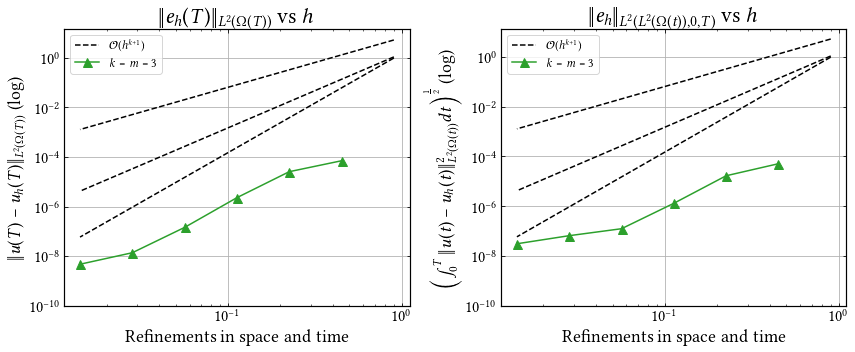

In [16]:
# paper.cpp

# N = 7, T = 0.5, tau = 0.05
# #error_classical_P1P1_fullstab =  
# #### running again with correct T norm on ross screen 241430
# error_conservative_P1P1_fullstab = [0.9103922923112666, 0.6831133501255253, 0.1790694186989171, 0.05580567115696776, 0.01339335764314571, 0.003331764718875724, 0.0008076682052737521, 0.0001998769950510804]
# error_conservative_P1P1_fullstab_T = [0.4582848214356584, 0.2856321446808385, 0.08177771419499358, 0.02530536992930246, 0.006233718785223333, 0.001521292228672025, 0.0003677946941598954, 9.060962291039232e-05]

# #error_classical_P1P1_macro = 
# #error_conservative_P1P1_macro =

# error_conservative_P2P2_fullstab = [0.3496442462945067, 0.2770147578588354, 0.04908378344162034, 0.006413251167785013, 0.0004576717349585284, 5.429622963486653e-05, 6.579099193449326e-06, 8.169415114955786e-07]
# error_conservative_P2P2_fullstab_T = [0.1695454054592171, 0.1353596329033109, 0.02672786319383531, 0.002675553338593597, 0.0002373537442938859, 2.735960737724968e-05, 3.287539339430602e-06, 4.076673719933756e-07]

# N = 9 in space and time, tau = 0.05, T = 0.5
error_conservative_P3P3_fullstab = [5.106774278405515e-05, 7.019264037528132e-05, 2.551064416934532e-05, 2.28264776612452e-06, 1.440056605429809e-07, 1.36858917458708e-08, 4.694475792144673e-09]
error_conservative_P3P3_fullstab_T = [5.267068329724878e-05, 5.202632165169026e-05, 1.694581509873016e-05, 1.303996791875186e-06, 1.240149111231107e-07, 6.51053141584803e-08, 3.080606134163541e-08]
reynold_error =  [2.371322854041759e-05, 3.229848591171139e-05, 2.982333741887979e-05, 7.599758434415592e-07, 6.252059709529957e-08, 3.314051189435397e-09, 1.082493835898485e-10]

# N = 14 in space and time, rest same
### running on ross screen?
# error_conservative_P3P3_fullstab = [5.368327142019485e-05, 2.115962419513509e-05, 3.624710701151075e-06, 3.625196809946201e-07, 1.928969862849764e-07, 2.494726722368689e-08]
# error_conservative_P3P3_fullstab_T = [4.824216527296165e-05, 1.564234146520498e-05, 2.604564975475948e-06, 9.74624235254499e-07, 3.406500199670256e-07, 1.292348218980394e-07]
# reynold_error =  [3.161164171024199e-05, 3.558135992066816e-05, 1.190133683403493e-06, 1.013983298635188e-06, 9.541871847592272e-08, 5.667831650000559e-08]

### redoing on ross screen
error_conservative_P3P3_fullstab = [7.041120284987748e-05, 2.549264162380667e-05, 2.282634415034527e-06, 1.440054290491487e-07, 1.368588650612762e-08, 4.694471748235677e-09]
error_conservative_P3P3_fullstab_T = [5.094044355374749e-05, 1.670411750729897e-05, 1.303999485278325e-06, 1.240145303131329e-07, 6.510529200459313e-08, 3.080605834380019e-08]


h = [0.9, 0.45, 0.225, 0.1125, 0.05625, 0.028125, 0.0140625]
dT = [0.25, 0.125, 0.0625, 0.03125, 0.015625, 0.0078125, 0.00390625]
nx = [2, 3, 5, 9, 18, 36, 72]
ny = [2, 3, 5, 9, 18, 36, 72]

ih = np.arange(0,7)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
ax1.loglog(h, 6.5*np.power(h, 2), linestyle="--", color="black", label=r"$\mathcal{O}(h^{k+1})$")   
ax1.loglog(h, 1.5*np.power(h, 3), linestyle="--", color="black")   
ax1.loglog(h, 1.5*np.power(h, 4), linestyle="--", color="black")   


# ax1.loglog(h, 4.*np.power(h, 3), linestyle="--", color="black")   
# ax1.loglog(h, 4*np.power(h, 4),label=r"Order $3, 4$", linestyle="--", color="black")   

# ax1.semilogy(ih, error_conservative_P1P1_fullstab, label= r"$k=m=1$", marker='o', markersize=9, linestyle="-", color="C3")
# ax1.semilogy(ih, error_conservative_P2P2_fullstab, label= r"$k=m=2$", marker='s', markersize=9, linestyle="-", color="C0")

#ax1.loglog(h, error_conservative_P3P3_fullstab, label= r"$k=m=3$", marker='^', markersize=9, linestyle="-", color="C2")
ax1.loglog(h[1:], error_conservative_P3P3_fullstab, label= r"$k=m=3$", marker='^', markersize=9, linestyle="-", color="C2")

#ax1.loglog(h, error_classical_P1P1, label= r"Non-conservative", marker='o', markersize=9, linestyle=(0, (5,7)), color="C3")

#ax1.set_ylim(1e-4, 2)
#ax1.set_xticks([0, 2, 4, 6])
ax1.set_yticks([1e-10, 1e-8, 1e-6, 1e-4, 1e-2, 1e0])
ax1.set_xlabel(r"Refinements in space and time")
ax1.tick_params(axis='both', which='major')
ax1.set_ylabel(r"$\|u(T)-u_h(T)\|_{L^2(\Omega(T))}$ (log)")
ax1.set_title(r"$\|e_h(T)\|_{L^2(\Omega(T))}$ vs $h$")
ax1.legend()
ax1.grid()

ax2.loglog(h, 6.5*np.power(h, 2), linestyle="--", color="black", label=r"$\mathcal{O}(h^{k+1})$")   
ax2.loglog(h, 1.5*np.power(h, 3), linestyle="--", color="black")   
ax2.loglog(h, 1.5*np.power(h, 4), linestyle="--", color="black") 
# ax2.loglog(h, 4.*np.power(h, 3), linestyle="--", color="black")   
# ax2.loglog(h, 4*np.power(h, 4),label=r"Order $3, 4$", linestyle="--", color="black")   

# ax2.semilogy(ih, error_conservative_P1P1_fullstab_T, label= r"$k=m=1$", marker='o', markersize=9, linestyle="-", color="C3")
# ax2.semilogy(ih, error_conservative_P2P2_fullstab_T, label= r"$k=m=2$", marker='s', markersize=9, linestyle="-", color="C0")

#ax2.loglog(h, error_conservative_P3P3_fullstab_T, label= r"$k=m=3$", marker='^', markersize=9, linestyle="-", color="C2")
ax2.loglog(h[1:], error_conservative_P3P3_fullstab_T, label= r"$k=m=3$", marker='^', markersize=9, linestyle="-", color="C2")

#ax2.set_xticks([0, 2, 4, 6])
ax2.set_yticks([1e-10, 1e-8, 1e-6, 1e-4, 1e-2, 1e0])
ax2.set_xlabel(r"Refinements in space and time")
ax2.tick_params(axis='both', which='major')
ax2.set_ylabel(r"\Big($\int_0^T\|u(t)-u_h(t)\|^2_{L^2(\Omega(t))}dt\Big)^{\frac{1}{2}}$ (log)")
ax2.set_title(r"$\|e_h\|_{L^2(L^2(\Omega(t)), 0, T)}$ vs $h$")
ax2.legend()
ax2.grid()
fig.tight_layout()
plt.show()

### Find dependency on time and space separately

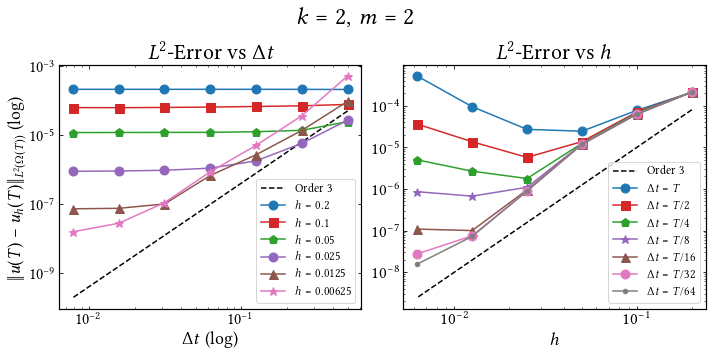

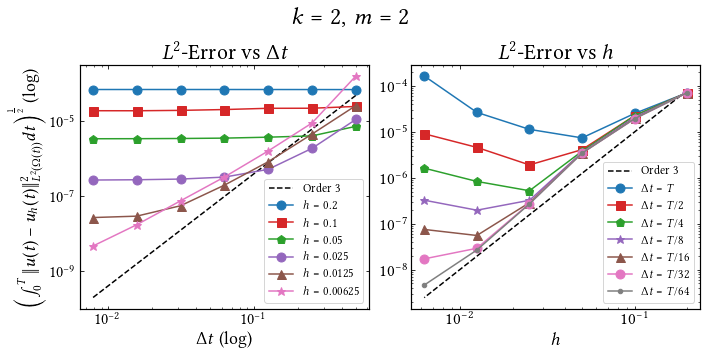

In [49]:
# # N = 7, tau = 5e-2

# # P1Poly x P1

# # L2 vs dt

# # h = 0.2
# error_P1P1_h02 = 


# # h = 0.1       
# error_P1P1_h01 = 

# # h = 0.05          
# error_P1P1_h005 = 

# # h = 0.025     
# error_P1P1_h0025 = 

# error_P1P1_h00125 =




# # L2 vs h

# # dT = T/4
# error_P1P1_nt4 = 

# # dT = T/8
# error_P1P1_nt8 = 

# # dT = T/16
# error_P1P1_nt16 = 

# # dT = T/32
# error_P1P1_nt32 = 

# # dT = T/64
# #error_P1P1_nt64 = 




# # P1 x P1
# fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# ax1.loglog(dt, 4.*np.power(dt, 3), linestyle="--", color="black")   
# ax1.loglog(dt, 4*np.power(dt, 4),label=r"Order $3, 4$", linestyle="--", color="black")   

# ax1.loglog(dt, error_P1P1_h02, label= r"$h=0.2$", marker='o', markersize=9, linestyle="-", color="C0")
# ax1.loglog(dt, error_P1P1_h01, label= r"$h=0.1$", marker='s', markersize=9, linestyle="-", color="C3")
# ax1.loglog(dt, error_P1P1_h005, label= r"$h=0.05$", marker='p', markersize=9, linestyle="-", color="C2")
# ax1.loglog(dt, error_P1P1_h0025, label= r"$h=0.025$", marker='o', markersize=9, linestyle="-", color="C4")
# ax1.loglog(dt, error_P1P1_h00125, label= r"$h=0.0125$", marker='^', markersize=9, linestyle="-", color="C5")
# # ax1.loglog(dt, error_P2P2_h000625, label= r"$h=0.00625$", marker='*', markersize=9, linestyle="-", color="C6")

# ax1.set_ylim(4e-9, 2)
# ax1.set_yticks([1e-8, 1e-6, 1e-4, 1e-2, 1e0])
# ax1.set_xlabel(r"$\Delta t$ (log)")
# ax1.tick_params(axis='both', which='major')
# ax1.set_ylabel(r"$\|u(T)-u_h(T)\|_{L^2(\Omega(T))}$ (log)")
# ax1.set_title(r"$L^2$-Error vs $\Delta t$")
# ax1.legend()

# #ax1.grid()
# ax2.loglog(h, .8e-1*np.power(h, 2), linestyle="--", color="black")   
# ax2.loglog(h, 2.e-1*np.power(h, 3),label=r"Order $2, 3$", linestyle="--", color="black")   

# ax2.loglog(h, error_P1P1_nt4, label= r"$\Delta t = T/4$", marker='o', markersize=9, linestyle="-", color="C0")
# ax2.loglog(h, error_P1P1_nt8, label= r"$\Delta t = T/8$", marker='s', markersize=9, linestyle="-", color="C3")
# ax2.loglog(h, error_P1P1_nt16, label= r"$\Delta t = T/16$", marker='p', markersize=9, linestyle="-", color="C2")
# ax2.loglog(h, error_P1P1_nt32, label= r"$\Delta t = T/32$", marker='o', markersize=9, linestyle="-", color="C4")

# ax2.set_xlabel(r"$h$ (log)", fontsize=18)
# ax2.tick_params(axis='both', which='major', labelsize=17)
# ax2.set_title(r"$L^2$-Error vs $h$")
# ax2.set_ylim(4e-8, 2)
# ax2.set_yticks([1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1e0])
# #handles, labels = [(a + b) for a, b in zip(ax1.get_legend_handles_labels(), ax2.get_legend_handles_labels())]
# #fig.legend(handles, labels, loc='lower center', ncols=4, bbox_to_anchor=(0.5, -0.25), fontsize=18, frameon=False)
# fig.suptitle(r"$k=1$, $m=1$", fontsize=24)
# #ax2.grid()
# ax2.legend()

# plt.tight_layout()
# plt.show()


ih = np.arange(0,6)
dt = [0.5, 0.25, 0.125, 0.0625, 0.03125, 0.015625, 0.0078125]
h = [0.2, 0.1, 0.05, 0.025, 0.0125, 0.00625]

# N = 7, tau = 5e-2

# P2Poly x P2

# L2 vs dt

# h = 0.2
error_P2P2_h02 = [0.0002098733245659444, 0.0002115228379727763, 0.0002123720208037273, 0.0002121350318914439, 0.000212094475155792, 0.0002122491619440301, 0.0002120807816363674]
error_P2P2_h02_T = [7.140588389751768e-05, 7.15685888481981e-05, 7.167777602242848e-05, 7.175248550172433e-05, 7.175591014311118e-05, 7.175480733813118e-05, 7.175463935255043e-05]

# h = 0.1       
error_P2P2_h01 = [7.739430442366578e-05, 7.047963145111453e-05, 6.738914046724831e-05, 6.479944531689936e-05, 6.306488048153266e-05, 6.218680103150675e-05, 6.251597298322816e-05]
error_P2P2_h01_T = [2.523923428441184e-05, 2.259978973807881e-05, 2.251524451955126e-05, 2.084464284266656e-05, 1.980153057056894e-05, 1.934686807665109e-05, 1.938469393641862e-05]

# h = 0.05          
error_P2P2_h005 = [2.435319818832177e-05, 1.371406239598756e-05, 1.245791937091921e-05, 1.19839226930894e-05, 1.191063954321453e-05, 1.18597093742831e-05, 1.17884380554461e-05]
error_P2P2_h005_T = [7.399172944340714e-06, 4.1062801202394e-06, 3.790683831386447e-06, 3.57780972697109e-06, 3.495216083731276e-06, 3.455140356915023e-06, 3.44044686632854e-06]

# h = 0.025     
error_P2P2_h0025 =  [2.698667684755659e-05, 5.731227600305999e-06, 1.777290889818071e-06, 1.093402903133726e-06, 9.473575359592982e-07, 9.032942823803282e-07, 8.861550408872751e-07]
error_P2P2_h0025_T = [1.133819409757473e-05, 1.905197728106685e-06, 5.213058543493108e-07, 3.229661357684447e-07, 2.862602266573355e-07, 2.743432976057416e-07, 2.696562398715738e-07]

# h = 0.0125        
error_P2P2_h00125 = [9.473086821289757e-05, 1.362193613393107e-05, 2.667287017035474e-06, 6.706051275319013e-07, 9.976362341661325e-08, 7.46009585891007e-08, 7.21687058933893e-08]
error_P2P2_h00125_T = [2.660516199481741e-05, 4.59365114646193e-06, 8.322156864516269e-07, 1.9647511672275e-07, 5.523628252377079e-08, 2.90611148408196e-08, 2.664703331407645e-08]

# h = 0.00625
### running on nine screen
error_P2P2_h000625 = [0.000516914210162543, 3.616747915943058e-05, 4.99773890092825e-06, 8.577994247851288e-07, 1.083831985710772e-07, 2.747503444706975e-08, 1.554482136130591e-08]
error_P2P2_h000625_T = [0.0001651567979639595, 9.086819060516817e-06, 1.619670843700778e-06, 3.244486946017107e-07, 7.477890610937619e-08, 1.709835943796846e-08, 4.590873669070885e-09]


# # L2 vs h
h = [0.2, 0.1, 0.05, 0.025, 0.0125, 0.00625]
# dT = T
error_P2P2_nt1 = [0.0002098733245660286, 7.739430442305878e-05, 2.435319818820996e-05, 2.698667684755659e-05, 9.473086821288093e-05, 0.0005169142101610043]
error_P2P2_nt1_T = [7.140588389750706e-05, 2.523923428440828e-05, 7.399172944241318e-06, 1.133819409757473e-05, 2.66051619948755e-05, 0.0001651567979613188]

# dT = T/2
error_P2P2_nt2 = [0.000211522837972573, 7.047963145124475e-05, 1.371406239632594e-05, 5.731227600305999e-06, 1.362193613396849e-05, 3.616747915973766e-05]
error_P2P2_nt2_T = [7.156858884819278e-05, 2.259978973805737e-05, 4.106280120241253e-06, 1.905197728106685e-06, 4.593651146462816e-06, 9.086819060681311e-06]

# dT = T/4
error_P2P2_nt4 = [0.0002123720208037787, 6.738914046715538e-05, 1.24579193709187e-05, 1.777290889818071e-06, 2.667287017236132e-06, 4.997738900429955e-06]
error_P2P2_nt4_T = [7.167777602240199e-05, 2.251524451953848e-05, 3.790683831402025e-06, 5.213058543493108e-07, 8.322156864650496e-07, 1.61967084372789e-06]

# dT = T/8
error_P2P2_nt8 = [0.0002121350318914829, 6.479944531686188e-05, 1.198392269309984e-05, 1.093402903133726e-06, 6.70605127512622e-07, 8.577994245918797e-07]
error_P2P2_nt8_T = [7.17524855017259e-05, 2.084464284266113e-05, 3.577809726979748e-06, 3.229661357684447e-07, 1.964751167314848e-07, 3.244486946336823e-07]


# dT = T/16
error_P2P2_nt16 = [0.0002120944751557558, 6.306488048152881e-05, 1.191063954322065e-05, 9.473575359592982e-07, 9.976362353509745e-08, 1.08383198550625e-07]
error_P2P2_nt16_T = [7.17559101431101e-05, 1.980153057056298e-05, 3.495216083727196e-06, 2.862602266573355e-07, 5.523628252823047e-08, 7.477890610908657e-08]

# dT = T/32
error_P2P2_nt32 = [0.0002122491619440811, 6.218680103152403e-05, 1.185970937426402e-05, 9.032942823803282e-07, 7.46009585633069e-08, 2.747503444488243e-08]
error_P2P2_nt32_T = [7.175480733813216e-05, 1.934686807665346e-05, 3.455140356908084e-06, 2.743432976057416e-07, 2.906111484128678e-08, 1.709835944255486e-08]

# dT = T/64 
error_P2P2_nt64 = [0.0002120807816364546, 6.251597298320475e-05, 1.178843805542382e-05, 8.861550408872751e-07, 7.216870595836319e-08, 1.554482135980419e-08]
error_P2P2_nt64_T = [7.175463935255671e-05, 1.938469393642289e-05, 3.440446866328574e-06, 2.696562398715738e-07, 2.664703331814868e-08, 4.59087366798063e-09]

# P2 x P2
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

ax1.loglog(dt, 4.e-4*np.power(dt, 3),label=r"Order $3$", linestyle="--", color="black")   
#ax1.loglog(dt, 4.e-4*np.power(dt, 4),label=r"Order $3, 4$", linestyle="--", color="black")   

ax1.loglog(dt, error_P2P2_h02, label= r"$h=0.2$", marker='o', markersize=9, linestyle="-", color="C0")
ax1.loglog(dt, error_P2P2_h01, label= r"$h=0.1$", marker='s', markersize=9, linestyle="-", color="C3")
ax1.loglog(dt, error_P2P2_h005, label= r"$h=0.05$", marker='p', markersize=9, linestyle="-", color="C2")
ax1.loglog(dt, error_P2P2_h0025, label= r"$h=0.025$", marker='o', markersize=9, linestyle="-", color="C4")
ax1.loglog(dt, error_P2P2_h00125, label= r"$h=0.0125$", marker='^', markersize=9, linestyle="-", color="C5")
ax1.loglog(dt, error_P2P2_h000625, label= r"$h=0.00625$", marker='*', markersize=9, linestyle="-", color="C6")

#ax1.set_ylim(4e-9, 2)
#ax1.set_yticks([1e-10, 1e-8, 1e-6, 1e-4, 1e-2])
ax1.set_xlabel(r"$\Delta t$ (log)")
ax1.tick_params(axis='both', which='major')
ax1.set_ylabel(r"$\|u(T)-u_h(T)\|_{L^2(\Omega(T))}$ (log)")
ax1.set_title(r"$L^2$-Error vs $\Delta t$")
ax1.legend()

#ax1.grid()
#ax2.loglog(h, .4e-2*np.power(h, 2), linestyle="--", color="black")   
ax2.loglog(h, 1.e-2*np.power(h, 3),label=r"Order $3$", linestyle="--", color="black")   


ax2.loglog(h, error_P2P2_nt1, label= r"$\Delta t = T$", marker='o', markersize=9, linestyle="-", color="C0")
ax2.loglog(h, error_P2P2_nt2, label= r"$\Delta t = T/2$", marker='s', markersize=9, linestyle="-", color="C3")
ax2.loglog(h, error_P2P2_nt4, label= r"$\Delta t = T/4$", marker='p', markersize=9, linestyle="-", color="C2")
ax2.loglog(h, error_P2P2_nt8, label= r"$\Delta t = T/8$", marker='*', markersize=9, linestyle="-", color="C4")
ax2.loglog(h, error_P2P2_nt16, label= r"$\Delta t = T/16$", marker='^', markersize=9, linestyle="-", color="C5")
ax2.loglog(h, error_P2P2_nt32, label= r"$\Delta t = T/32$", marker='o', markersize=9, linestyle="-", color="C6")
ax2.loglog(h, error_P2P2_nt64, label= r"$\Delta t = T/64$", marker='.', markersize=9, linestyle="-", color="C7")

ax2.set_xlabel(r"$h$", fontsize=18)
ax2.tick_params(axis='both', which='major', labelsize=17)
ax2.set_title(r"$L^2$-Error vs $h$")
#ax2.set_ylim(4e-8, 2)
#ax2.set_xticks([0, 2, 4, 6])
#ax2.set_yticks([1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1e0])
#handles, labels = [(a + b) for a, b in zip(ax1.get_legend_handles_labels(), ax2.get_legend_handles_labels())]
#fig.legend(handles, labels, loc='lower center', ncols=4, bbox_to_anchor=(0.5, -0.25), fontsize=18, frameon=False)
fig.suptitle(r"$k=2$, $m=2$", fontsize=24)
#ax2.grid()
ax2.legend()

plt.tight_layout()
plt.show()






# P2 x P2 integrated in time 
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

ax1.loglog(dt, 4.e-4*np.power(dt, 3), label=r"Order $3$", linestyle="--", color="black")   
#ax1.loglog(dt, 4.e-4*np.power(dt, 4),label=r"Order $3, 4$", linestyle="--", color="black")   

ax1.loglog(dt, error_P2P2_h02_T, label= r"$h=0.2$", marker='o', markersize=9, linestyle="-", color="C0")
ax1.loglog(dt, error_P2P2_h01_T, label= r"$h=0.1$", marker='s', markersize=9, linestyle="-", color="C3")
ax1.loglog(dt, error_P2P2_h005_T, label= r"$h=0.05$", marker='p', markersize=9, linestyle="-", color="C2")
ax1.loglog(dt, error_P2P2_h0025_T, label= r"$h=0.025$", marker='o', markersize=9, linestyle="-", color="C4")
ax1.loglog(dt, error_P2P2_h00125_T, label= r"$h=0.0125$", marker='^', markersize=9, linestyle="-", color="C5")
ax1.loglog(dt, error_P2P2_h000625_T, label= r"$h=0.00625$", marker='*', markersize=9, linestyle="-", color="C6")

#ax1.set_ylim(4e-9, 2)
#ax1.set_yticks([1e-10, 1e-8, 1e-6, 1e-4, 1e-2])
ax1.set_xlabel(r"$\Delta t$ (log)")
ax1.tick_params(axis='both', which='major')
#ax1.set_ylabel(r"$\|u(T)-u_h(T)\|_{L^2(\Omega(T))}$ (log)")
ax1.set_ylabel(r"\Big($\int_0^T\|u(t)-u_h(t)\|^2_{L^2(\Omega(t))}dt\Big)^{\frac{1}{2}}$ (log)")

ax1.set_title(r"$L^2$-Error vs $\Delta t$")
ax1.legend()

#ax1.grid()
#ax2.loglog(h, .4e-2*np.power(h, 2), linestyle="--", color="black")   
ax2.loglog(h, 1.e-2*np.power(h, 3),label=r"Order $3$", linestyle="--", color="black")   


ax2.loglog(h, error_P2P2_nt1_T, label= r"$\Delta t = T$", marker='o', markersize=9, linestyle="-", color="C0")
ax2.loglog(h, error_P2P2_nt2_T, label= r"$\Delta t = T/2$", marker='s', markersize=9, linestyle="-", color="C3")
ax2.loglog(h, error_P2P2_nt4_T, label= r"$\Delta t = T/4$", marker='p', markersize=9, linestyle="-", color="C2")
ax2.loglog(h, error_P2P2_nt8_T, label= r"$\Delta t = T/8$", marker='*', markersize=9, linestyle="-", color="C4")
ax2.loglog(h, error_P2P2_nt16_T, label= r"$\Delta t = T/16$", marker='^', markersize=9, linestyle="-", color="C5")
ax2.loglog(h, error_P2P2_nt32_T, label= r"$\Delta t = T/32$", marker='o', markersize=9, linestyle="-", color="C6")
ax2.loglog(h, error_P2P2_nt64_T, label= r"$\Delta t = T/64$", marker='.', markersize=9, linestyle="-", color="C7")

ax2.set_xlabel(r"$h$", fontsize=18)
ax2.tick_params(axis='both', which='major', labelsize=17)
ax2.set_title(r"$L^2$-Error vs $h$")
#ax2.set_ylim(4e-8, 2)
#ax2.set_xticks([0, 2, 4, 6])
#ax2.set_yticks([1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1e0])
#handles, labels = [(a + b) for a, b in zip(ax1.get_legend_handles_labels(), ax2.get_legend_handles_labels())]
#fig.legend(handles, labels, loc='lower center', ncols=4, bbox_to_anchor=(0.5, -0.25), fontsize=18, frameon=False)
fig.suptitle(r"$k=2$, $m=2$", fontsize=24)
#ax2.grid()
ax2.legend()

plt.tight_layout()
plt.show()



The above results seem to indicate that 
\begin{equation*}
\|u(T)-u_h(T)\|_{\Omega(T)} \lesssim \Delta t^{k+1} + h^m.
\end{equation*}

This would mean that we need to set $m=k+1$ in order to get optimal convergence when $h\propto \Delta t$.

This is in contrast to the examples of Preuss and Lehrenfeld, where we saw
\begin{equation*}
\|u(T)-u_h(T)\|_{\Omega(T)} \lesssim \Delta t^{k+2} + h^{m+1}
\end{equation*}

